# Importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import plotly.express as px
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Primary analysis of data

In [8]:
df = pd.read_csv('Mobiles_reviews.csv')
df.head()

,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts
0,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews","4.3★5,105 Ratings &413 Reviews","Harmanpreet SinghCertified Buyer, Ludhiana25 ...","5, 5, 5, 5, 5, 4, 5, 4, 3, 3","Great product, Terrific, Terrific purchase, Ju...",Sound is very good. Good work is Motorola 👈REA...
1,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews","4.3★5,105 Ratings &413 Reviews","Flipkart CustomerCertified Buyer, Gobardanga1 ...","3, 5, 5, 5, 5, 5, 5, 5, 4","Fair, Worth every penny, Terrific, Best in the...",Overall phone is good 👍. But the specification...
2,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...","4.4★8,384 Ratings &635 Reviews","Sayan BiswasCertified Buyer, Bagnan3 months ag...","5, 5, 5, 5, 5, 5, 4, 5, 5, 4","Awesome, Mind-blowing purchase, Perfect produc...",The camera quality is awesome😁 ...the display ...
3,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...","4.4★8,384 Ratings &635 Reviews","Chehara TripuraCertified Buyer, Agartala3 mont...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Awesome, Just wow!, Best in the market!, Best ...",Everything is perfect in this segment and Came...
4,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews","4.4★9,263 Ratings &283 Reviews","Shivshankar SinghCertified Buyer, Manesar7 mon...","5, 5, 5, 3, 5, 4, 5, 5, 3, 4","Simply awesome, Mind-blowing purchase, Just wo...","Good lookREAD MORE, Very very niceREAD MORE, P..."


In [9]:
df.shape

(124, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Product URL                  124 non-null    object
 1   Title                        124 non-null    object
 2   Number of Ratings & Reviews  124 non-null    object
 3   Authors                      124 non-null    object
 4   Ratings                      121 non-null    object
 5   Review Titles                124 non-null    object
 6   Review Texts                 124 non-null    object
dtypes: object(7)
memory usage: 6.9+ KB


In [11]:
df.describe()

,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts
count,124,124,124,124,121,124,124
unique,124,61,54,106,79,106,106
top,https://www.flipkart.com/motorola-g05-forest-g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...","4.6★5,278 Ratings &224 Reviews","KALYANI PRADHANCertified Buyer, Damanjodi1 mon...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Good choice, Worst experience ever!, Hated it!...","Very Nice.READ MORE, The finger print access s..."
freq,1,4,4,2,22,2,2


In [12]:
df.isnull().sum()

Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        0
Ratings                        3
Review Titles                  0
Review Texts                   0
dtype: int64

In [13]:
df.columns

Index(['Product URL', 'Title', 'Number of Ratings & Reviews', 'Authors',
       'Ratings', 'Review Titles', 'Review Texts'],
      dtype='object')

In [14]:
df.dtypes

Product URL                    object
Title                          object
Number of Ratings & Reviews    object
Authors                        object
Ratings                        object
Review Titles                  object
Review Texts                   object
dtype: object

# Descritpion about the dataset

## Flipkart Mobiles Reviews Dataset - Column Descriptions

## 1. Product URL  
- Contains the web link (URL) of the product's page on Flipkart of Mobiles.  
- Helps in identifying the exact product being reviewed and allows direct navigation to the product page.  
- **Format:** A string in the form of a hyperlink (e.g., `https://www.flipkart.com/motorola-edge-50-fusion/p/itmxyz`).  

## 2. Title  
- Represents the name of the product being reviewed.  
- Includes details like the brand, model, color, and storage capacity.  
- **Example:** `"Motorola Edge 50 Fusion (Marshmallow Blue, 256 GB) Reviews"`  
- Important for distinguishing between product variants.

## 3. Number of Ratings & Reviews  
- Stores the total number of ratings and reviews submitted by customers.  
- Provides insight into the product’s popularity.  
- **Format:** `"4.3‚òÖ5,105 Ratings &413 Reviews"` or separate fields for ratings and reviews.  

## 4. Authors  
- Contains the names or usernames of customers who left a review.  
- **Example:** `"Harmanpreet  SinghCertified Buyer, Ludhiana25 days ago8014PermalinkReport Abuse, Srinivas JakkulaCertified Buyer, Warangal25 days ago26864PermalinkReport Abuse"`.  
- Helps in tracking reviews from different users and analyzing their feedback.  

## 5. Ratings  
- Represents the star rating given by a reviewer, typically on a scale of 1 to 5.  
- **Format:** Numeric (integer or float), e.g., `1`, `3.5`, `5`.  
- Indicates the user’s overall satisfaction with the product.  

## 6. Review Title  
- A short summary or headline of the review provided by the user.  
- **Example:** `"Excellent, Decent product, Good choice, Terrific purchase, Wonderful!"`  
- Useful for quickly understanding the essence of the review.  

## 7. Review Texts  
- Contains the full-text review written by the user.  
- Provides detailed feedback about the product, including pros and cons.  
- **Example:** `"Super mobaileREAD MORE, Very nice and good quality üòäREAD MORE, According to price is goodREAD MORE, Ok thREAD MORE, VeryREAD MORE!"`  
- Critical for sentiment analysis and deeper customer insights.  


# Data Cleaning

### Assigning unique id for every product 

In [19]:
df['Product_ID'] = pd.Categorical(df['Title']).codes + 1
df.insert(0, 'Product_ID', df.pop('Product_ID'))
df.head()

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews","4.3★5,105 Ratings &413 Reviews","Harmanpreet SinghCertified Buyer, Ludhiana25 ...","5, 5, 5, 5, 5, 4, 5, 4, 3, 3","Great product, Terrific, Terrific purchase, Ju...",Sound is very good. Good work is Motorola 👈REA...
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews","4.3★5,105 Ratings &413 Reviews","Flipkart CustomerCertified Buyer, Gobardanga1 ...","3, 5, 5, 5, 5, 5, 5, 5, 4","Fair, Worth every penny, Terrific, Best in the...",Overall phone is good 👍. But the specification...
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...","4.4★8,384 Ratings &635 Reviews","Sayan BiswasCertified Buyer, Bagnan3 months ag...","5, 5, 5, 5, 5, 5, 4, 5, 5, 4","Awesome, Mind-blowing purchase, Perfect produc...",The camera quality is awesome😁 ...the display ...
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...","4.4★8,384 Ratings &635 Reviews","Chehara TripuraCertified Buyer, Agartala3 mont...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Awesome, Just wow!, Best in the market!, Best ...",Everything is perfect in this segment and Came...
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews","4.4★9,263 Ratings &283 Reviews","Shivshankar SinghCertified Buyer, Manesar7 mon...","5, 5, 5, 3, 5, 4, 5, 5, 3, 4","Simply awesome, Mind-blowing purchase, Just wo...","Good lookREAD MORE, Very very niceREAD MORE, P..."


In [20]:
# Assigning unique values for products
df['Product_ID'].unique()

array([21, 44, 56, 34, 28, 23, 22, 58, 31, 60, 33, 30, 55, 53, 20, 59, 52,
       39,  5, 12, 51, 42, 40, 43, 47, 35, 38,  1, 50, 46, 45, 41, 48, 37,
       36,  4, 11,  9, 10, 13,  6,  8,  2,  3, 18, 24, 57, 17, 32, 54, 19,
       16, 15,  7, 27, 49, 29, 26, 25, 61, 14], dtype=int8)

In [21]:
# total no of products taken into consideration
df['Product_ID'].max()

61

In [22]:
# Changing datatype of 'Number of Ratings & Reviews' column
df['Number of Ratings & Reviews'] = df['Number of Ratings & Reviews'].astype(str)

In [23]:
# Extracting Overall_Rating from Number of Ratings & Reviews' column
df['Overall_Rating'] = df['Number of Ratings & Reviews'].str.extract(r"^(\d+\.\d+)")

In [24]:
df.head()

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews","4.3★5,105 Ratings &413 Reviews","Harmanpreet SinghCertified Buyer, Ludhiana25 ...","5, 5, 5, 5, 5, 4, 5, 4, 3, 3","Great product, Terrific, Terrific purchase, Ju...",Sound is very good. Good work is Motorola 👈REA...,4.3
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews","4.3★5,105 Ratings &413 Reviews","Flipkart CustomerCertified Buyer, Gobardanga1 ...","3, 5, 5, 5, 5, 5, 5, 5, 4","Fair, Worth every penny, Terrific, Best in the...",Overall phone is good 👍. But the specification...,4.3
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...","4.4★8,384 Ratings &635 Reviews","Sayan BiswasCertified Buyer, Bagnan3 months ag...","5, 5, 5, 5, 5, 5, 4, 5, 5, 4","Awesome, Mind-blowing purchase, Perfect produc...",The camera quality is awesome😁 ...the display ...,4.4
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...","4.4★8,384 Ratings &635 Reviews","Chehara TripuraCertified Buyer, Agartala3 mont...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Awesome, Just wow!, Best in the market!, Best ...",Everything is perfect in this segment and Came...,4.4
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews","4.4★9,263 Ratings &283 Reviews","Shivshankar SinghCertified Buyer, Manesar7 mon...","5, 5, 5, 3, 5, 4, 5, 5, 3, 4","Simply awesome, Mind-blowing purchase, Just wo...","Good lookREAD MORE, Very very niceREAD MORE, P...",4.4


In [25]:
df['Number of Ratings & Reviews'] = df['Number of Ratings & Reviews'].str.replace(',', '')
df[['Overall_Rating', 'No_of_Ratings', 'No_of_Reviews']] = df['Number of Ratings & Reviews'].str.extract(r'(\d+\.\d+)★(\d+)[^\d]+(\d+)')

In [26]:
# Extracting mobile info
def extract_info(product):
    model_match = re.match(r'^(.*?)\s?\(', product)
    model = model_match.group(1).strip() if model_match else None

    colour_match = re.search(r'\((.*?),', product)
    colour = colour_match.group(1).strip() if colour_match else None

    storage_match = re.search(r',\s*(.*?)\)', product)
    storage = storage_match.group(1).strip() if storage_match else None

    return pd.Series([model, colour, storage])

df[['Model', 'Colour', 'Storage']] = df['Title'].apply(extract_info)

In [27]:
df.isnull().sum()

Product_ID                     0
Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        0
Ratings                        3
Review Titles                  0
Review Texts                   0
Overall_Rating                 2
No_of_Ratings                  2
No_of_Reviews                  2
Model                          7
Colour                         7
Storage                        7
dtype: int64

In [28]:
# Function for calculating 'average ratings' from 'Ratings' column

def calculate_mean(ratings):
    if isinstance(ratings, str):
        values = list(map(int, ratings.split(',')))
        return round(sum(values) / len(values), 1)
    return None 

df['Average Rating'] = df['Ratings'].apply(calculate_mean)

In [29]:
print(df.loc[0, 'Review Titles'])

Great product, Terrific, Terrific purchase, Just wow!, Must buy!, Worth the money, Wonderful, Good choice, Decent product for the price, Decent product


In [30]:
exclude = string.punctuation

# Function to remove punctuation
def remove_punc(data):
    return data.translate(str.maketrans('', '', exclude))

In [31]:
df['Review Titles'] = df['Review Titles'].apply(remove_punc)
df['Review Titles'] = df['Review Titles'].str.lower()
df['Review Titles'].sample(5)

72     simply awesome mindblowing purchase good choic...
113    great product best in the market awesome worth...
73     mindblowing purchase fabulous perfect product ...
85     brilliant perfect product perfect product best...
81     super super highly recommended great product t...
Name: Review Titles, dtype: object

In [32]:
print(df.loc[0, 'Review Texts'])

Sound is very good. Good work is Motorola 👈READ MORE, Worth of money..READ MORE, GoodREAD MORE, Worth itFront camera 10/9Rear camera 10/7Designer 10/10Display 10/10Performance 10/10READ MORE, Very niceREAD MORE, best phoneBattery is goodDisplay is good with 90hzCamera is also good at this pricePerformance is ok for daily using appsNot recommended for gamingREAD MORE, Overall is good in this price range. Camera is awesomeREAD MORE, Mobile is not like any budget segment phone, the design, the camera quality, the speaker quality, the display, the UI, the performance everything is TOP NOTCH no complaintsBut the cons are,No IR sensorSlow chargingThat's it.Overall it's best in this segmentREAD MORE, The device lags at times, slow charging and is significantly slow for day to day tasks. But it has a good display, decent UI and does basics well. Doesn't look like a 7k phone. The 18W charger is not there. It comes with 10W standard adapter for charging. Charging takes quite a bit of time.READ M

In [33]:
df['Review Texts'] = df['Review Texts'].apply(remove_punc)
print(df.loc[0, 'Review Texts'])

Sound is very good Good work is Motorola 👈READ MORE Worth of moneyREAD MORE GoodREAD MORE Worth itFront camera 109Rear camera 107Designer 1010Display 1010Performance 1010READ MORE Very niceREAD MORE best phoneBattery is goodDisplay is good with 90hzCamera is also good at this pricePerformance is ok for daily using appsNot recommended for gamingREAD MORE Overall is good in this price range Camera is awesomeREAD MORE Mobile is not like any budget segment phone the design the camera quality the speaker quality the display the UI the performance everything is TOP NOTCH no complaintsBut the cons areNo IR sensorSlow chargingThats itOverall its best in this segmentREAD MORE The device lags at times slow charging and is significantly slow for day to day tasks But it has a good display decent UI and does basics well Doesnt look like a 7k phone The 18W charger is not there It comes with 10W standard adapter for charging Charging takes quite a bit of timeREAD MORE Mobile is good at this price ran

In [34]:
# Removing 'READ MORE', it is repeated lot of times

df['Review Texts'] = df['Review Texts'].str.replace('READ MORE', '')
print(df.loc[0, 'Review Texts'])

Sound is very good Good work is Motorola 👈 Worth of money Good Worth itFront camera 109Rear camera 107Designer 1010Display 1010Performance 1010 Very nice best phoneBattery is goodDisplay is good with 90hzCamera is also good at this pricePerformance is ok for daily using appsNot recommended for gaming Overall is good in this price range Camera is awesome Mobile is not like any budget segment phone the design the camera quality the speaker quality the display the UI the performance everything is TOP NOTCH no complaintsBut the cons areNo IR sensorSlow chargingThats itOverall its best in this segment The device lags at times slow charging and is significantly slow for day to day tasks But it has a good display decent UI and does basics well Doesnt look like a 7k phone The 18W charger is not there It comes with 10W standard adapter for charging Charging takes quite a bit of time Mobile is good at this price range only Battery Charger is slow


In [35]:
# Removing emojis

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [36]:
df['Review Texts'] = df['Review Texts'].apply(remove_emoji)
print(df.loc[0, 'Review Texts'])

Sound is very good Good work is Motorola  Worth of money Good Worth itFront camera 109Rear camera 107Designer 1010Display 1010Performance 1010 Very nice best phoneBattery is goodDisplay is good with 90hzCamera is also good at this pricePerformance is ok for daily using appsNot recommended for gaming Overall is good in this price range Camera is awesome Mobile is not like any budget segment phone the design the camera quality the speaker quality the display the UI the performance everything is TOP NOTCH no complaintsBut the cons areNo IR sensorSlow chargingThats itOverall its best in this segment The device lags at times slow charging and is significantly slow for day to day tasks But it has a good display decent UI and does basics well Doesnt look like a 7k phone The 18W charger is not there It comes with 10W standard adapter for charging Charging takes quite a bit of time Mobile is good at this price range only Battery Charger is slow


In [37]:
# Stop word removal

stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [38]:
# Function to remove stopwords

def remove_stop_words(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [39]:
df['Review Texts'] = df['Review Texts'].apply(remove_stop_words)
print(df.loc[0, 'Review Texts'])

Sound   good Good work  Motorola Worth  money Good Worth itFront camera 109Rear camera 107Designer 1010Display 1010Performance 1010 Very nice best phoneBattery  goodDisplay  good  90hzCamera  also good   pricePerformance  ok  daily using appsNot recommended  gaming Overall  good   price range Camera  awesome Mobile   like  budget segment phone  design  camera quality  speaker quality  display  UI  performance everything  TOP NOTCH  complaintsBut  cons areNo IR sensorSlow chargingThats itOverall  best   segment The device lags  times slow charging   significantly slow  day  day tasks But    good display decent UI   basics well Doesnt look like  7k phone The 18W charger    It comes  10W standard adapter  charging Charging takes quite  bit  time Mobile  good   price range  Battery Charger  slow


In [40]:
# Removing numbers from the text

df['Review Texts'] = df['Review Texts'].str.replace(r'\d+', '', regex=True)
print(df.loc[0, 'Review Texts'])

Sound   good Good work  Motorola Worth  money Good Worth itFront camera Rear camera Designer Display Performance  Very nice best phoneBattery  goodDisplay  good  hzCamera  also good   pricePerformance  ok  daily using appsNot recommended  gaming Overall  good   price range Camera  awesome Mobile   like  budget segment phone  design  camera quality  speaker quality  display  UI  performance everything  TOP NOTCH  complaintsBut  cons areNo IR sensorSlow chargingThats itOverall  best   segment The device lags  times slow charging   significantly slow  day  day tasks But    good display decent UI   basics well Doesnt look like  k phone The W charger    It comes  W standard adapter  charging Charging takes quite  bit  time Mobile  good   price range  Battery Charger  slow


In [41]:
# Removing extra spaces
df['Review Texts'] = df['Review Texts'].str.strip().str.replace(r'\s+', ' ', regex=True)
df['Review Texts'] = df['Review Texts'].str.lower()
print(df.loc[0, 'Review Texts'])

sound good good work motorola worth money good worth itfront camera rear camera designer display performance very nice best phonebattery gooddisplay good hzcamera also good priceperformance ok daily using appsnot recommended gaming overall good price range camera awesome mobile like budget segment phone design camera quality speaker quality display ui performance everything top notch complaintsbut cons areno ir sensorslow chargingthats itoverall best segment the device lags times slow charging significantly slow day day tasks but good display decent ui basics well doesnt look like k phone the w charger it comes w standard adapter charging charging takes quite bit time mobile good price range battery charger slow


In [42]:
df.isnull().sum()

Product_ID                     0
Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        0
Ratings                        3
Review Titles                  0
Review Texts                   0
Overall_Rating                 2
No_of_Ratings                  2
No_of_Reviews                  2
Model                          7
Colour                         7
Storage                        7
Average Rating                 3
dtype: int64

### Handling null values

In [44]:
# Checking for null values in the column No_of_Ratings
df.loc[df['No_of_Ratings'].isnull() == True]

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Model,Colour,Storage,Average Rating
27,20,https://www.flipkart.com/kechaoda-a26/product-...,Kechaoda A26 Reviews,4★25285 Ratings &1478 Reviews,"Ram DurgaCertified Buyer, BhadrachalamFeb, 202...","4, 4, 5, 5, 5, 5, 5, 4, 5, 5",worth the money pretty good mindblowing purcha...,very small gud phone fm radio working properly...,NaN,NaN,NaN,None,None,None,4.7
28,20,https://www.flipkart.com/kechaoda-a26/product-...,Kechaoda A26 Reviews,4★25285 Ratings &1478 Reviews,"Flipkart CustomerCertified Buyer, AnakapalleMa...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5",terrific purchase terrific purchase highly rec...,very nice product nice itemgood battery very n...,NaN,NaN,NaN,None,None,None,5.0


In [45]:
# Filling average rating with mean values
df['Average Rating'] = df['Average Rating'].fillna(df['Average Rating'].mean())
df['Average Rating'] = round(df['Average Rating'], 1)

In [46]:
# Map for handling null values
product_map = {20: 'Kechaoda', 35: 'SAMSUNG', 52: 'SAMSUNG', 50: 'SAMSUNG'}

# Filling missing Model using ProductID
df['Model'] = df.apply(lambda row: product_map[row['Product_ID']] if pd.isnull(row['Model']) else row['Model'], axis=1)

In [47]:
# Filling the missing values 
df.loc[(df['Product_ID'] == 20) & (df['Overall_Rating'].isnull()), 'Overall_Rating'] = 4
df.loc[(df['Product_ID'] == 20) & (df['No_of_Ratings'].isnull()), 'No_of_Ratings'] = 25285
df.loc[(df['Product_ID'] == 20) & (df['No_of_Reviews'].isnull()), 'No_of_Reviews'] = 1478

In [48]:
df.drop(columns = ['Number of Ratings & Reviews', 'Authors', 'Ratings'])

,Product_ID,Product URL,Title,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Model,Colour,Storage,Average Rating
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",great product terrific terrific purchase just ...,sound good good work motorola worth money good...,4.3,5105,413,MOTOROLA g05,Forest Green,64 GB,4.4
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",fair worth every penny terrific best in the ma...,overall phone good but specifications like bat...,4.3,5105,413,MOTOROLA g05,Forest Green,64 GB,4.7
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",awesome mindblowing purchase perfect product h...,the camera quality awesome display also awesom...,4.4,8384,635,SAMSUNG Galaxy M35 5G,DayBreak Blue,128 GB,4.8
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",awesome just wow best in the market best in th...,everything perfect segment camera also very go...,4.4,8384,635,SAMSUNG Galaxy M35 5G,DayBreak Blue,128 GB,5.0
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews",simply awesome mindblowing purchase just wow d...,good look very nice product goodthank flipkart...,4.4,9263,283,realme C61,Safari Green,128 GB,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
119,25,https://www.flipkart.com/oppo-f21-pro-sunset-o...,"OPPO F21 Pro (Sunset Orange, 128 GB) Reviews",just wow worth every penny mindblowing purchas...,v good product nice fine its nice very good ca...,4.3,6615,449,OPPO F21 Pro,Sunset Orange,128 GB,5.0
120,61,https://www.flipkart.com/vivo-v30-pro-5g-andam...,"vivo V30 Pro 5G (Andaman Blue, 256 GB) Reviews",good choice good choice wonderful must buy jus...,i love camera like dslr best regular photo sho...,4.5,5986,745,vivo V30 Pro 5G,Andaman Blue,256 GB,4.7
121,61,https://www.flipkart.com/vivo-v30-pro-5g-andam...,"vivo V30 Pro 5G (Andaman Blue, 256 GB) Reviews",just wow fabulous classy product wonderful nic...,camera really superbdisplay is greatlooks matt...,4.5,5986,745,vivo V30 Pro 5G,Andaman Blue,256 GB,4.8
122,14,https://www.flipkart.com/honor-90-5g-midnight-...,"Honor 90 5G (Midnight Black, 512 GB) Reviews",fabulous awesome mindblowing purchase nice pro...,excellent value money love everything phone it...,4.2,1595,163,Honor 90 5G,Midnight Black,512 GB,4.8


In [49]:
# New order of the columns 
new_order = ['Product_ID', 'Product URL', 'Title', 'Model', 'Colour', 'Storage', 'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average Rating',
             'Review Titles', 'Review Texts']
df = df[new_order]

In [50]:
df.columns = ['Unique_ID', 'Product_URL', 'Product_Title', 'Model', 'Colour', 'Storage', 'No_of_Ratings', 
              'No_of_Reviews', 'Overall_Rating', 'Average_Rating', 'Review_Titles', 'Review_Texts']

In [51]:
# Filling null values
df.fillna('Unknown', inplace = True)

In [52]:
df.isnull().sum()

Unique_ID         0
Product_URL       0
Product_Title     0
Model             0
Colour            0
Storage           0
No_of_Ratings     0
No_of_Reviews     0
Overall_Rating    0
Average_Rating    0
Review_Titles     0
Review_Texts      0
dtype: int64

In [53]:
df.head()

,Unique_ID,Product_URL,Product_Title,Model,Colour,Storage,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Review_Titles,Review_Texts
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,64 GB,5105,413,4.3,4.4,great product terrific terrific purchase just ...,sound good good work motorola worth money good...
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,64 GB,5105,413,4.3,4.7,fair worth every penny terrific best in the ma...,overall phone good but specifications like bat...
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,128 GB,8384,635,4.4,4.8,awesome mindblowing purchase perfect product h...,the camera quality awesome display also awesom...
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,128 GB,8384,635,4.4,5.0,awesome just wow best in the market best in th...,everything perfect segment camera also very go...
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews",realme C61,Safari Green,128 GB,9263,283,4.4,4.4,simply awesome mindblowing purchase just wow d...,good look very nice product goodthank flipkart...


In [54]:
# df.to_csv('Mobiles_cleaned_info.csv', index = False)

# Data Analysis

In [56]:
df.head()

,Unique_ID,Product_URL,Product_Title,Model,Colour,Storage,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Review_Titles,Review_Texts
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,64 GB,5105,413,4.3,4.4,great product terrific terrific purchase just ...,sound good good work motorola worth money good...
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,64 GB,5105,413,4.3,4.7,fair worth every penny terrific best in the ma...,overall phone good but specifications like bat...
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,128 GB,8384,635,4.4,4.8,awesome mindblowing purchase perfect product h...,the camera quality awesome display also awesom...
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,128 GB,8384,635,4.4,5.0,awesome just wow best in the market best in th...,everything perfect segment camera also very go...
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews",realme C61,Safari Green,128 GB,9263,283,4.4,4.4,simply awesome mindblowing purchase just wow d...,good look very nice product goodthank flipkart...


### Adding price column to the data as it is very useful for our further analysis price may vary, these prices are considered on that day price only

In [58]:
# Adding price column to the dataset as the price is very useful for our further analysis

prices = [
    "6999", "6999", "18999", "18999", "8499", "8499", "7999", "7999",
    "14999", "14999", "12999", "12999", "24999", "24999", "10999", "10999",
    "19999", "19999", "13499", "13499", "6499", "6499", "39999", "8499",
    "8499", "6999", "6999", "1199", "1199", "17999", "17999", "1499",
    "1499", "7999", "7999", "79900", "79900", "34999", "34999", "8499",
    "8499", "9499", "9499", "13999", "13999", "14999", "14999", "15999",
    "15999", "49999", "49999", "1499", "1499", "16999", "16999", "52999",
    "52999", "1599", "74999", "74999", "18999", "18999", "9499", "9499",
    "89999", "89999", "16999", "16999", "7999", "7999", "14999", "14999",
    "79900", "79900", "34999", "34999", "31999", "31999", "59999", "59999",
    "69999", "69999", "89900", "89900", "39999", "39999", "52999", "52999",
    "79900", "79900", "10999", "10999", "24999", "24999", "7999", "7999",
    "19999", "19999", "22999", "22999", "15999", "15999", "6499", "6499",
    "21999", "21999", "17999", "17999", "129900", "129900", "14999", "14999",
    "129999", "129999", "28999", "28999", "89999", "89999", "21999", "21999",
    "34999", "34999", "37999", "37999"
]

df['Price'] = prices

In [59]:
new_order1 = ['Unique_ID', 'Product_URL', 'Product_Title', 'Model', 'Colour', 'Storage', 'No_of_Ratings', 
              'No_of_Reviews', 'Overall_Rating', 'Average_Rating', 'Price', 'Review_Titles', 'Review_Texts']
df = df[new_order1]
df.head()

,Unique_ID,Product_URL,Product_Title,Model,Colour,Storage,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Price,Review_Titles,Review_Texts
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,64 GB,5105,413,4.3,4.4,6999,great product terrific terrific purchase just ...,sound good good work motorola worth money good...
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,64 GB,5105,413,4.3,4.7,6999,fair worth every penny terrific best in the ma...,overall phone good but specifications like bat...
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,128 GB,8384,635,4.4,4.8,18999,awesome mindblowing purchase perfect product h...,the camera quality awesome display also awesom...
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,128 GB,8384,635,4.4,5.0,18999,awesome just wow best in the market best in th...,everything perfect segment camera also very go...
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews",realme C61,Safari Green,128 GB,9263,283,4.4,4.4,8499,simply awesome mindblowing purchase just wow d...,good look very nice product goodthank flipkart...


In [60]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

print("\nNull Values in Each Column:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

print("\nSummary of Text Columns:")
print(df.describe(include='object'))

First 5 rows of the dataset:
   Unique_ID                                        Product_URL  \
0         21  https://www.flipkart.com/motorola-g05-forest-g...   
1         21  https://www.flipkart.com/motorola-g05-forest-g...   
2         44  https://www.flipkart.com/samsung-galaxy-m35-5g...   
3         44  https://www.flipkart.com/samsung-galaxy-m35-5g...   
4         56  https://www.flipkart.com/realme-c61-safari-gre...   

                                       Product_Title                  Model  \
0         MOTOROLA g05 (Forest Green, 64 GB) Reviews           MOTOROLA g05   
1         MOTOROLA g05 (Forest Green, 64 GB) Reviews           MOTOROLA g05   
2  SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...  SAMSUNG Galaxy M35 5G   
3  SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...  SAMSUNG Galaxy M35 5G   
4          realme C61 (Safari Green, 128 GB) Reviews             realme C61   

          Colour Storage No_of_Ratings No_of_Reviews Overall_Rating  \
0   Forest Green   64 

In [61]:
# Converting numeric columns from object to int/float

df['No_of_Ratings'] = df['No_of_Ratings'].astype(float)
df['No_of_Reviews'] = df['No_of_Reviews'].astype(float)
df['Overall_Rating'] = df['Overall_Rating'].astype(float)

df['Price'] = df['Price'].astype(float)
df['Storage_GB'] = df['Storage'].str.extract('(\d+)').fillna(-1).astype(int)
df['Model'] = df['Model'].astype('category')
df['Colour'] = df['Colour'].astype('category')

In [62]:
# No storage in the title extracted so filled with -1
df.loc[df['Storage_GB'] == -1]

,Unique_ID,Product_URL,Product_Title,Model,Colour,Storage,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Price,Review_Titles,Review_Texts,Storage_GB
27,20,https://www.flipkart.com/kechaoda-a26/product-...,Kechaoda A26 Reviews,Kechaoda,Unknown,Unknown,25285.0,1478.0,4.0,4.7,1199.0,worth the money pretty good mindblowing purcha...,very small gud phone fm radio working properly...,-1
28,20,https://www.flipkart.com/kechaoda-a26/product-...,Kechaoda A26 Reviews,Kechaoda,Unknown,Unknown,25285.0,1478.0,4.0,5.0,1199.0,terrific purchase terrific purchase highly rec...,very nice product nice itemgood battery very n...,-1
31,52,https://www.flipkart.com/samsung-sm-1207/produ...,SAMSUNG SM 1207 Reviews,SAMSUNG,Unknown,Unknown,1085.0,63.0,3.2,4.3,1499.0,expected a better product moderate worthless n...,charger working dont buy phone whole phone dim...,-1
32,52,https://www.flipkart.com/samsung-sm-1207/produ...,SAMSUNG SM 1207 Reviews,SAMSUNG,Unknown,Unknown,1085.0,63.0,3.2,4.5,1499.0,waste of money waste of money very good great ...,one number one waste productdont buy every one...,-1
51,35,https://www.flipkart.com/samsung-1207/product-...,SAMSUNG 1207 Reviews,SAMSUNG,Unknown,Unknown,2067.0,126.0,3.1,4.3,1499.0,very good very poor just okay wonderful unsati...,good mobile received complete different model ...,-1
52,35,https://www.flipkart.com/samsung-1207/product-...,SAMSUNG 1207 Reviews,SAMSUNG,Unknown,Unknown,2067.0,126.0,3.1,5.0,1499.0,worthless very poor utterly disappointed excel...,very poor product battery doesnt last even hou...,-1
57,50,https://www.flipkart.com/samsung-guru-music-2/...,SAMSUNG Guru Music 2 Reviews,SAMSUNG,Unknown,Unknown,54.0,4.0,3.3,4.7,1599.0,could be way better terrible product worst exp...,charger supported charging issue worst product...,-1


In [63]:
new_order1 = ['Unique_ID', 'Product_URL', 'Product_Title', 'Model', 'Colour', 'No_of_Ratings', 'No_of_Reviews',
              'Overall_Rating', 'Average_Rating', 'Price', 'Storage_GB', 'Review_Titles', 'Review_Texts']
df = df[new_order1]
df.head()

,Unique_ID,Product_URL,Product_Title,Model,Colour,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Price,Storage_GB,Review_Titles,Review_Texts
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,5105.0,413.0,4.3,4.4,6999.0,64,great product terrific terrific purchase just ...,sound good good work motorola worth money good...
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,5105.0,413.0,4.3,4.7,6999.0,64,fair worth every penny terrific best in the ma...,overall phone good but specifications like bat...
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,8384.0,635.0,4.4,4.8,18999.0,128,awesome mindblowing purchase perfect product h...,the camera quality awesome display also awesom...
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,8384.0,635.0,4.4,5.0,18999.0,128,awesome just wow best in the market best in th...,everything perfect segment camera also very go...
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews",realme C61,Safari Green,9263.0,283.0,4.4,4.4,8499.0,128,simply awesome mindblowing purchase just wow d...,good look very nice product goodthank flipkart...


### Univariate Analysis

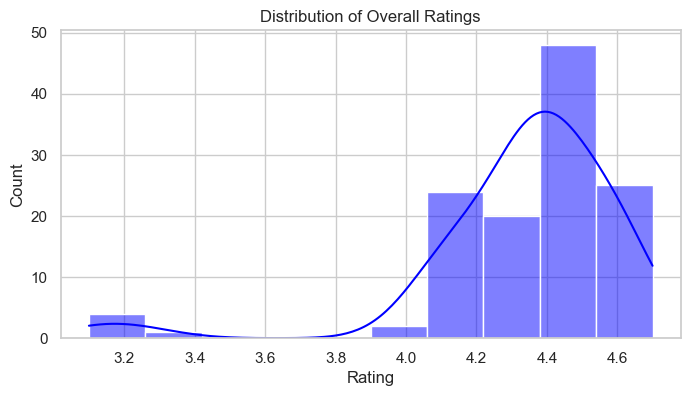

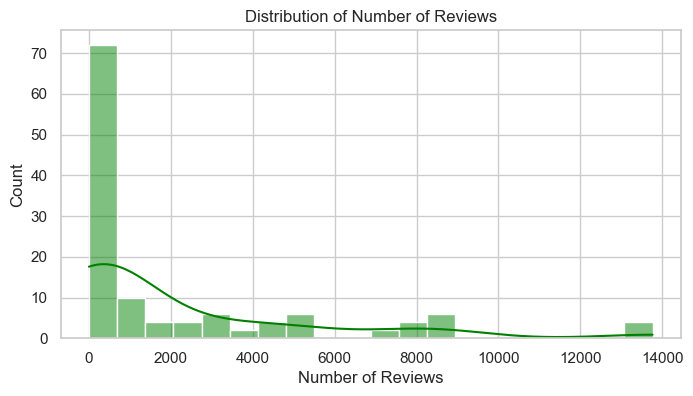

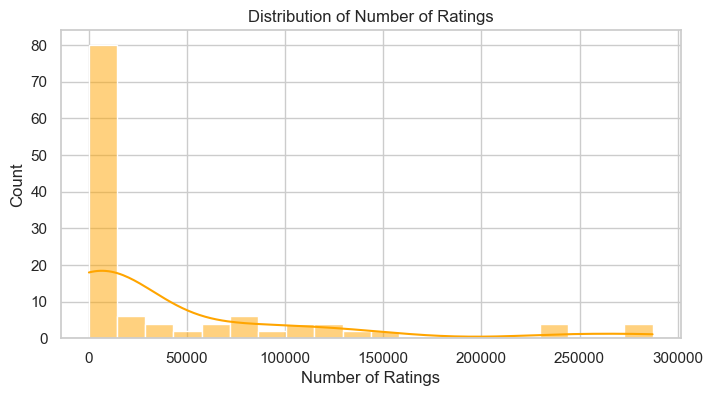

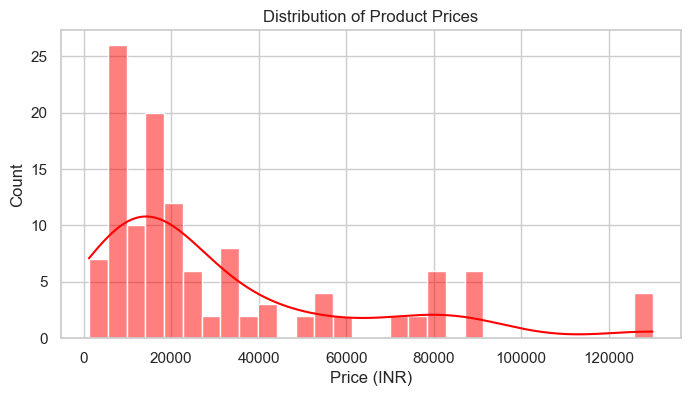

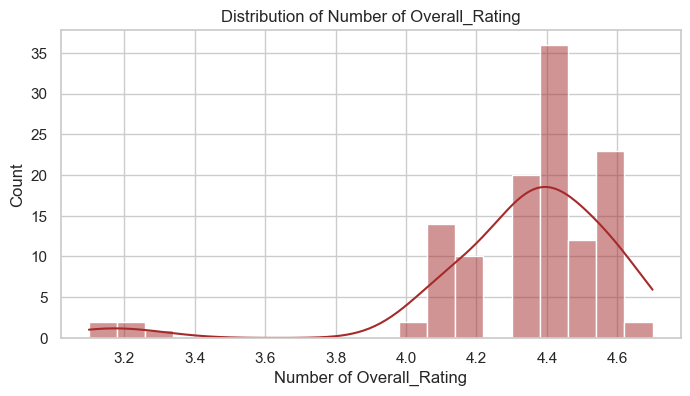

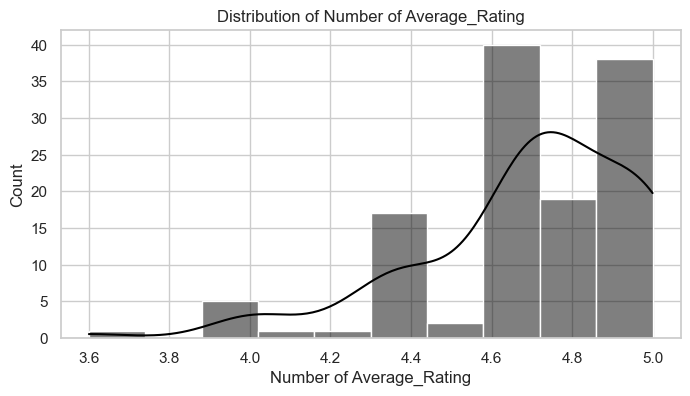

In [65]:
sns.set(style = "whitegrid")

plot_configs = [ # Columns, Bins, Color, Title, xlabel
                ("Overall_Rating", 10, 'blue', "Distribution of Overall Ratings", "Rating"),
                ("No_of_Reviews", 20, 'green', "Distribution of Number of Reviews", "Number of Reviews"),
                ("No_of_Ratings", 20, 'orange', "Distribution of Number of Ratings", "Number of Ratings"),
                ("Price", 30, 'red', "Distribution of Product Prices", "Price (INR)"),
                ("Overall_Rating", 20, 'brown', "Distribution of Number of Overall_Rating", "Number of Overall_Rating"),
                ("Average_Rating", 10, 'black', "Distribution of Number of Average_Rating", "Number of Average_Rating"),
]

for col, bins, color, title, xlabel in plot_configs:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=bins, kde=True, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.show()

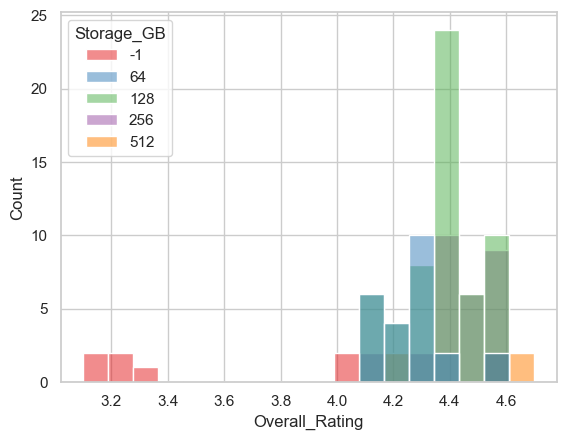

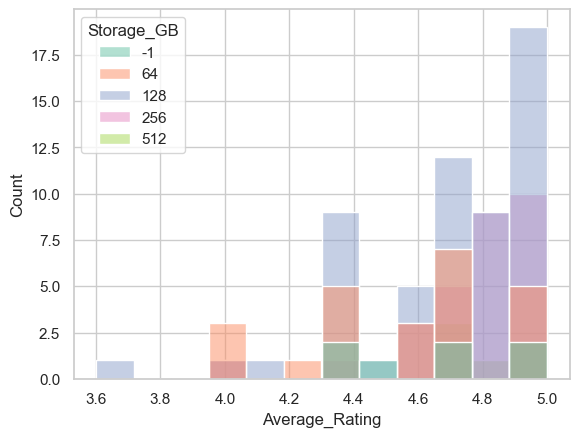

In [66]:
# Checking overall rating according to the storage
sns.histplot(data=df, x="Overall_Rating", hue="Storage_GB", palette="Set1")
plt.show()

# Checking average rating according to the storage
sns.histplot(data=df, x="Average_Rating", hue="Storage_GB", palette="Set2")
plt.show()

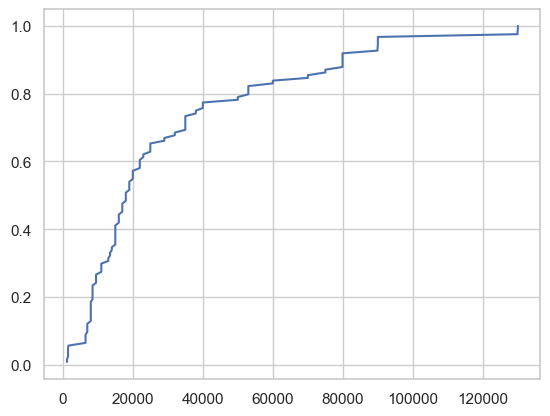

In [67]:
# ECDF (Empirical Cumulative Distribution Function)
# Helps to understand the percentile distribution.

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['Price'])
plt.plot(ecdf.x, ecdf.y)
plt.show()

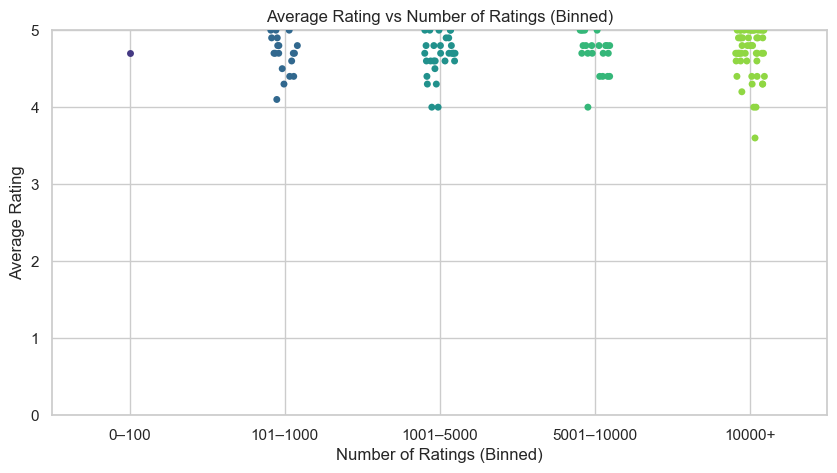

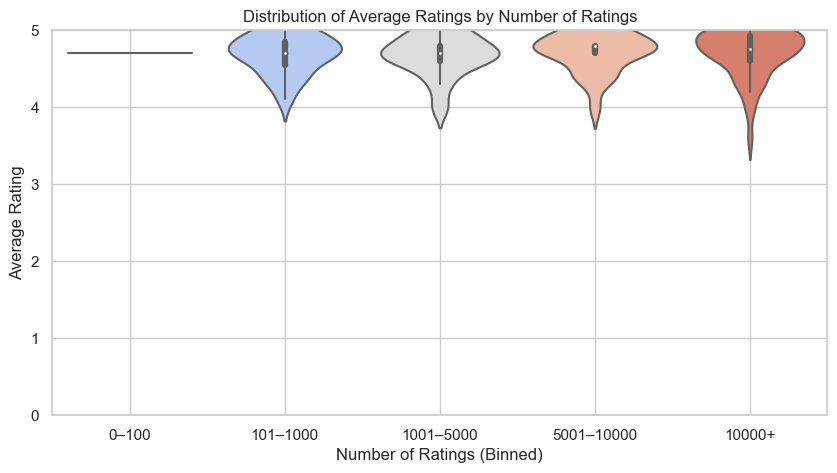

In [68]:


df_clean = df.dropna(subset=['No_of_Ratings', 'Average_Rating'])

bins = [0, 100, 1000, 5000, 10000, df_clean['No_of_Ratings'].max()]
labels = ['0–100', '101–1000', '1001–5000', '5001–10000', '10000+']
df_clean['Ratings_Bin'] = pd.cut(df_clean['No_of_Ratings'], bins=bins, labels=labels)

# Strip Plot
plt.figure(figsize=(10, 5))
sns.stripplot(data=df_clean, x='Ratings_Bin', y='Average_Rating', jitter=True, palette="viridis")
plt.title("Average Rating vs Number of Ratings (Binned)")
plt.xlabel("Number of Ratings (Binned)")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(True)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_clean, x='Ratings_Bin', y='Average_Rating', palette="coolwarm")
plt.title("Distribution of Average Ratings by Number of Ratings")
plt.xlabel("Number of Ratings (Binned)")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(True)
plt.show()

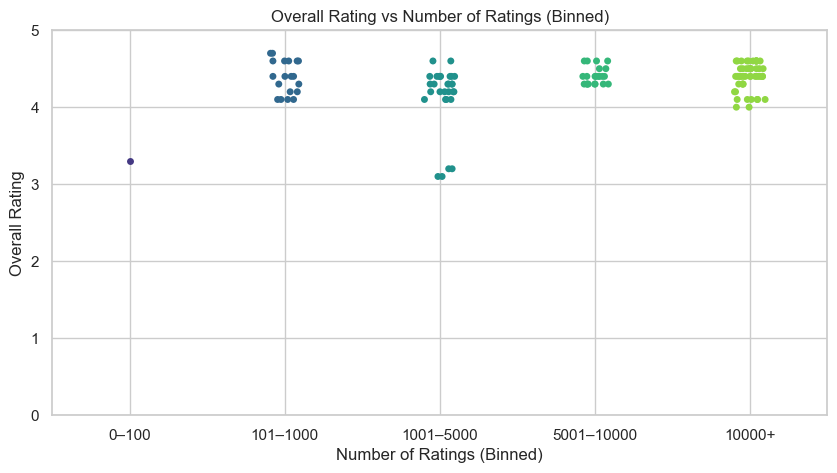

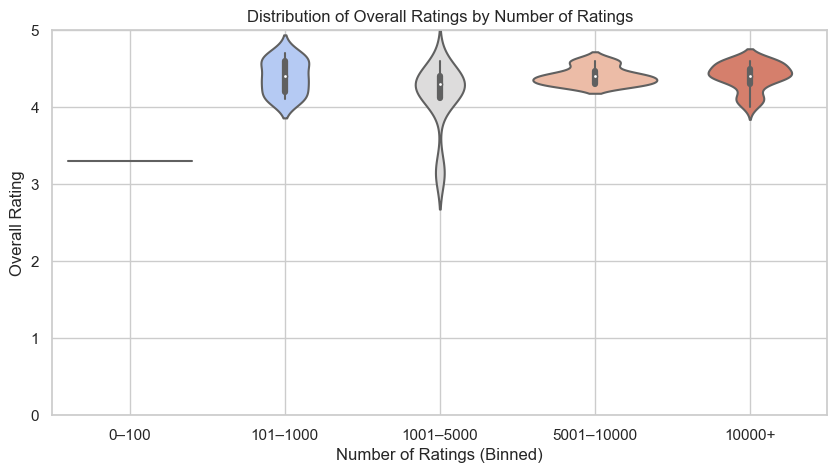

In [69]:
df_clean = df.dropna(subset=['No_of_Ratings', 'Average_Rating'])

bins = [0, 100, 1000, 5000, 10000, df_clean['No_of_Ratings'].max()]
labels = ['0–100', '101–1000', '1001–5000', '5001–10000', '10000+']
df_clean['Ratings_Bin'] = pd.cut(df_clean['No_of_Ratings'], bins=bins, labels=labels)

# Strip Plot
plt.figure(figsize=(10, 5))
sns.stripplot(data=df_clean, x='Ratings_Bin', y='Overall_Rating', jitter=True, palette="viridis")
plt.title("Overall Rating vs Number of Ratings (Binned)")
plt.xlabel("Number of Ratings (Binned)")
plt.ylabel("Overall Rating")
plt.ylim(0, 5)
plt.grid(True)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_clean, x='Ratings_Bin', y='Overall_Rating', palette="coolwarm")
plt.title("Distribution of Overall Ratings by Number of Ratings")
plt.xlabel("Number of Ratings (Binned)")
plt.ylabel("Overall Rating")
plt.ylim(0, 5)
plt.grid(True)
plt.show()

In [70]:
# Function for categorising the price 
def categorize_price(price):
    if price < 10000:
        return 'Budget'
    elif 10000 <= price <= 20000:
        return 'Mid-Range'
    else:
        return 'Premium'

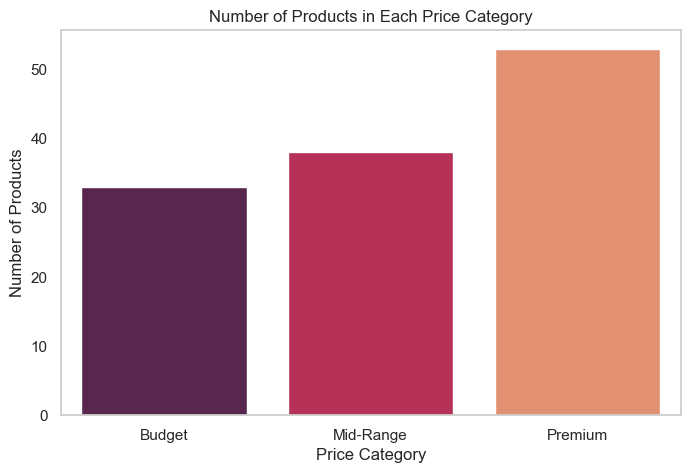

In [71]:
# Applying the function categorize_price
df['Price_Category'] = df['Price'].apply(categorize_price)

# Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Price_Category', order=['Budget', 'Mid-Range', 'Premium'], palette='rocket')
plt.title("Number of Products in Each Price Category")
plt.xlabel("Price Category")
plt.ylabel("Number of Products")
plt.grid(axis='y')
plt.show()

### Most Popular Smartphone Colors

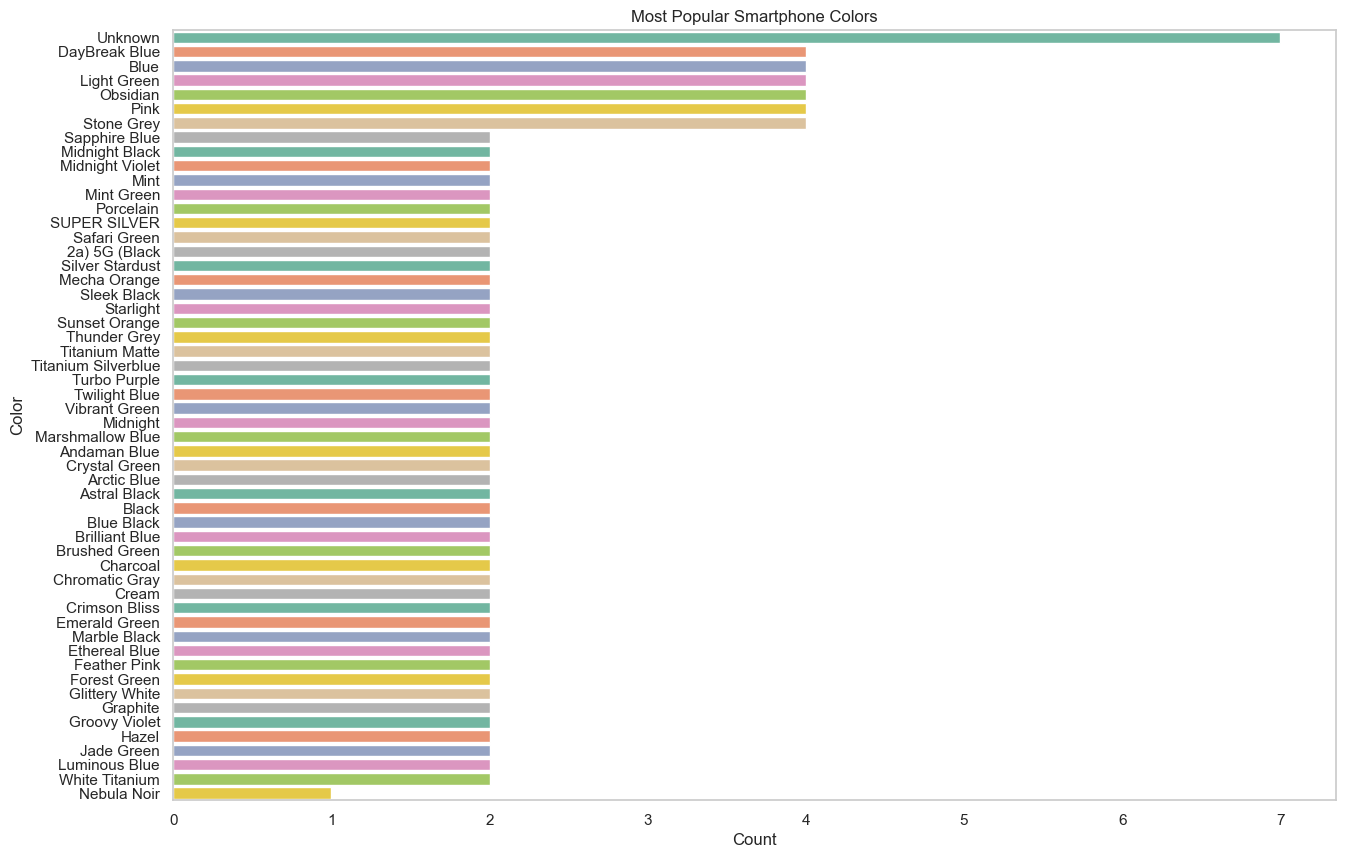

In [73]:
# Count plot for Colour preference
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='Colour', order=df['Colour'].value_counts().index, palette='Set2')
plt.title("Most Popular Smartphone Colors")
plt.xlabel("Count")
plt.ylabel("Color")
plt.grid(axis='x')
plt.show()

### Most Common Storage Options

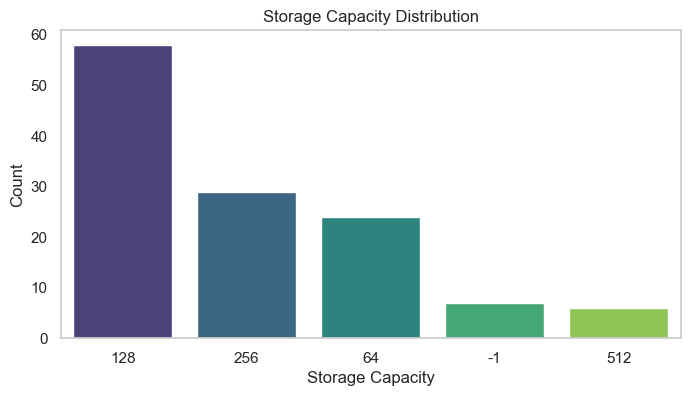

In [75]:
# Count plot for Storage capacity
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Storage_GB', order=df['Storage_GB'].value_counts().index, palette='viridis')
plt.title("Storage Capacity Distribution")
plt.xlabel("Storage Capacity")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

### Top 10 Most Reviewed Models

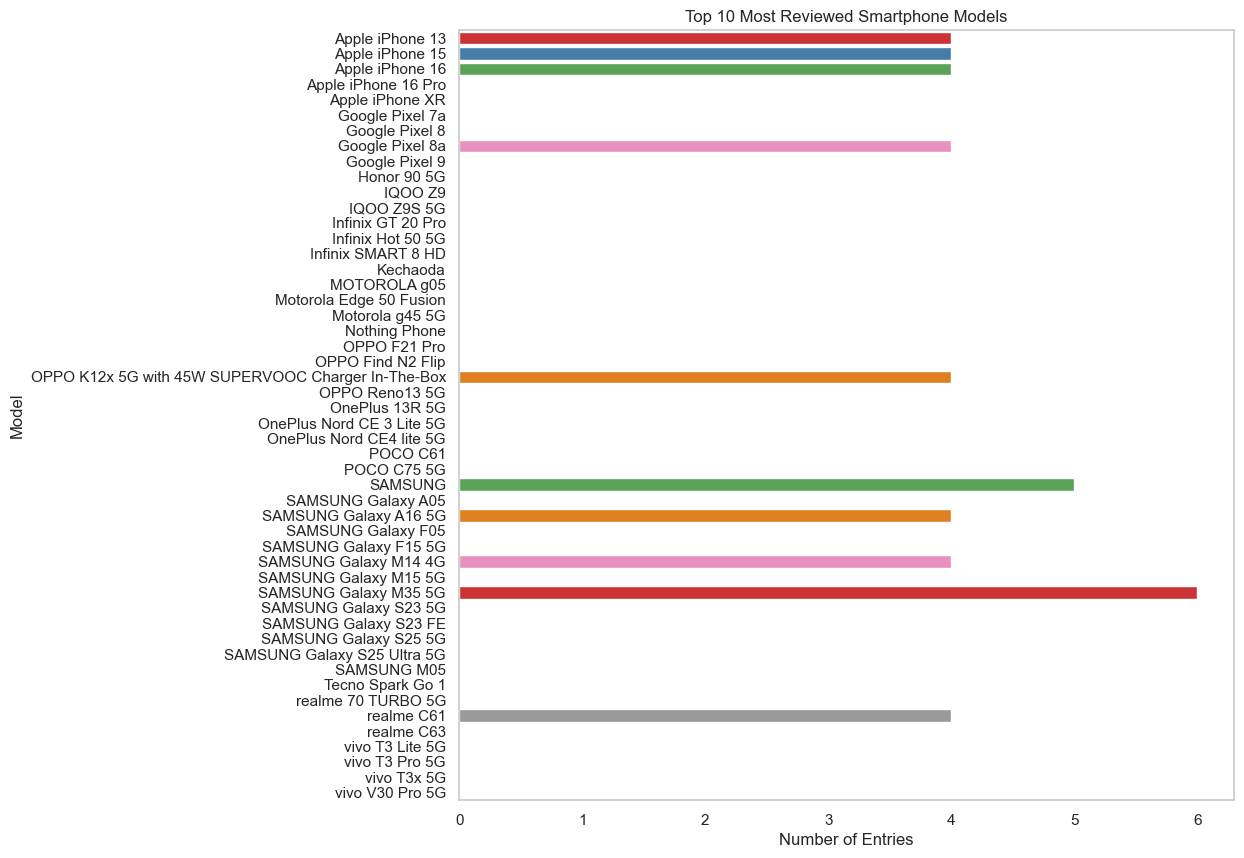

In [77]:
# Counting the most frequent models (top 10)
top_models = df['Model'].value_counts().nlargest(10)

# Bar plot for top models
plt.figure(figsize=(10, 10))
sns.barplot(x=top_models.values, y=top_models.index, palette='Set1')
plt.title("Top 10 Most Reviewed Smartphone Models")
plt.xlabel("Number of Entries")
plt.ylabel("Model")
plt.grid(axis='x')
plt.show()

### Review Length Distribution (in Words)

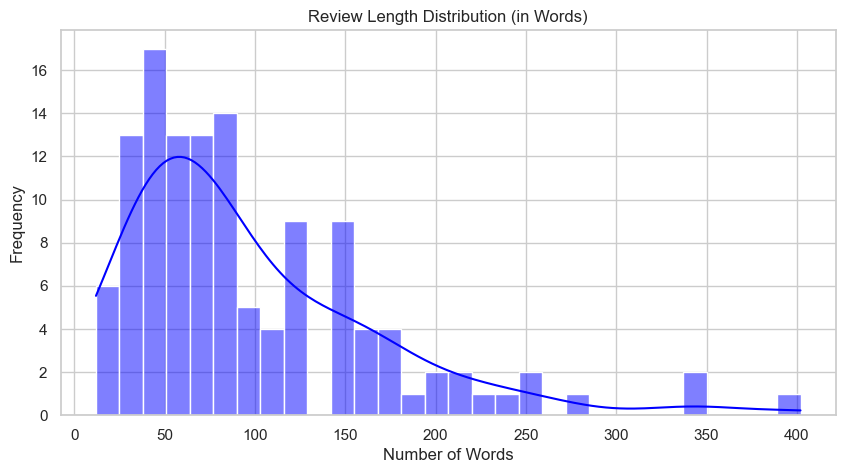

In [79]:
# Words count
df['Review_Word_Count'] = df['Review_Texts'].dropna().astype(str).apply(lambda x: len(x.split()))

# Plotting histogram of review word counts
plt.figure(figsize=(10, 5))
sns.histplot(df['Review_Word_Count'], bins=30, kde=True, color='blue')
plt.title("Review Length Distribution (in Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Bivariate Analysis

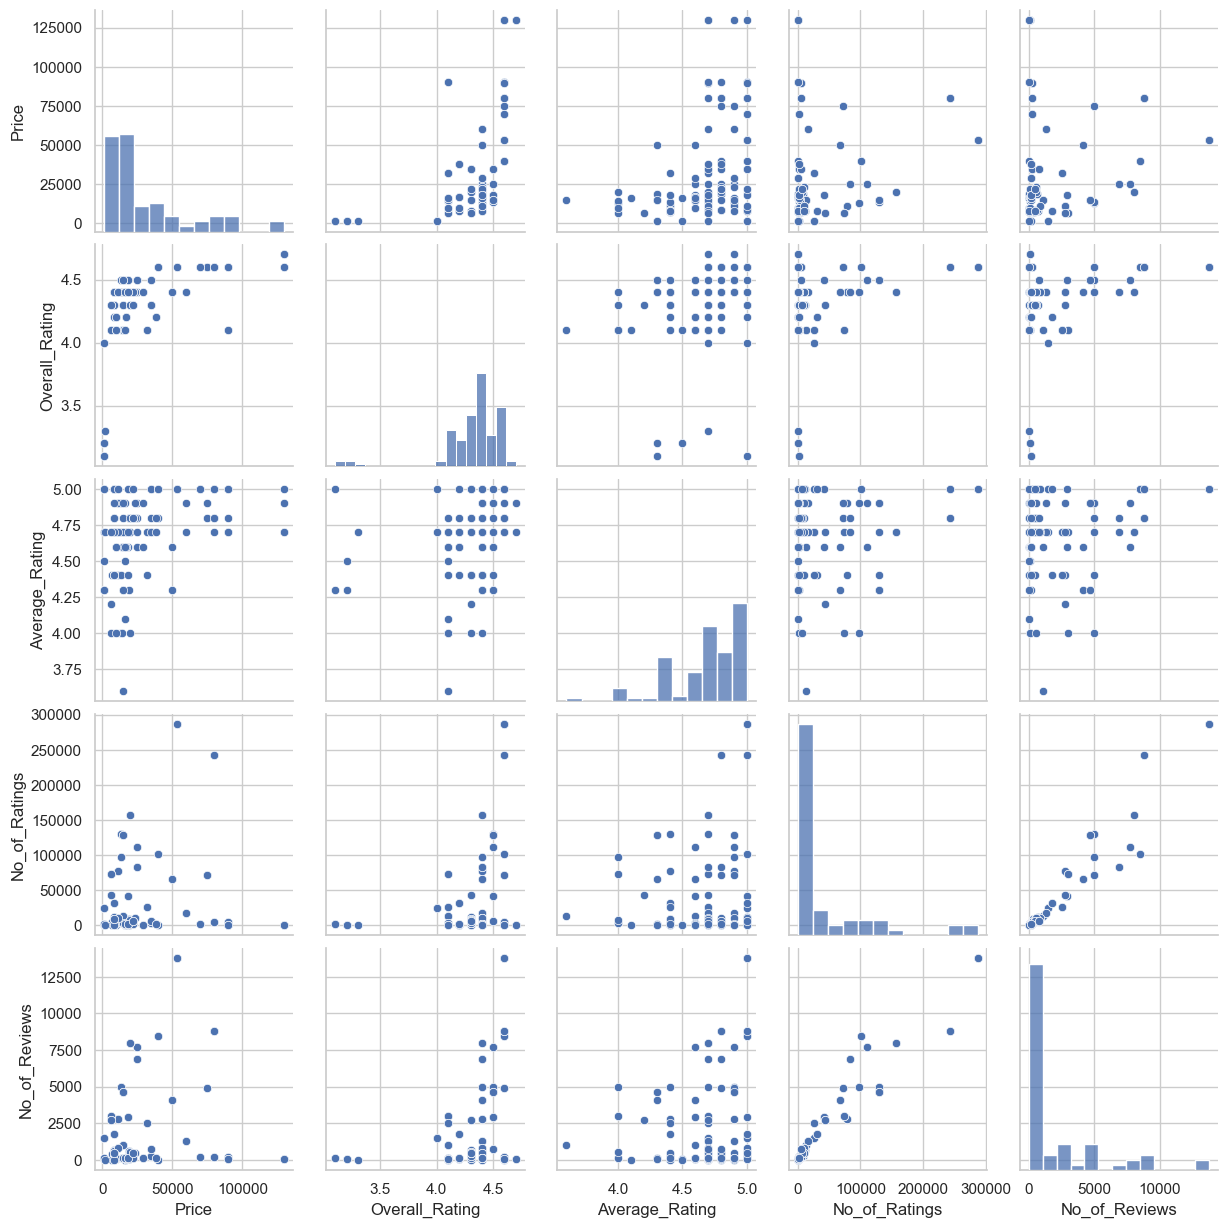

In [81]:
sns.pairplot(df[['Price', 'Overall_Rating', 'Average_Rating', 'No_of_Ratings', 'No_of_Reviews']])
plt.show()

### Price vs. Storage

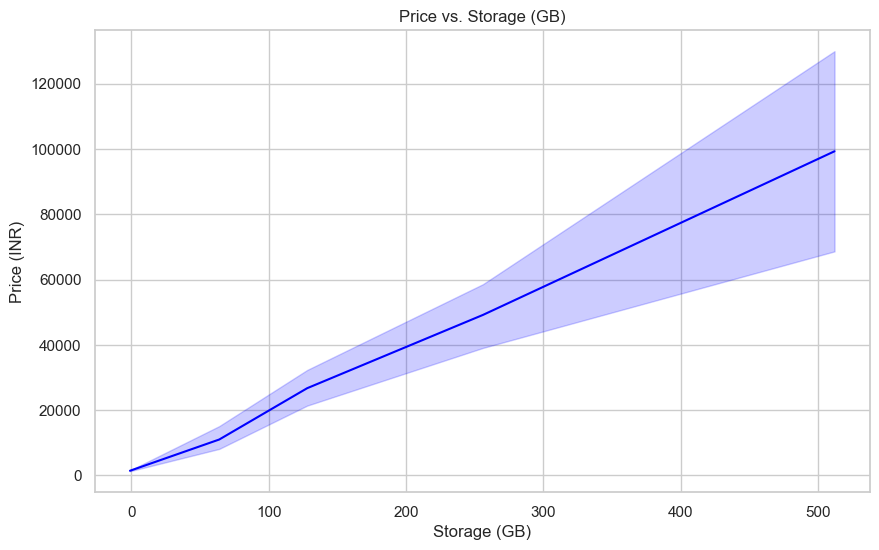

In [155]:
# Scatter plot for price vs storage 
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Storage_GB', y='Price', color='blue')

plt.title("Price vs. Storage (GB)")
plt.xlabel("Storage (GB)")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

### Distribution of price for different storage categories

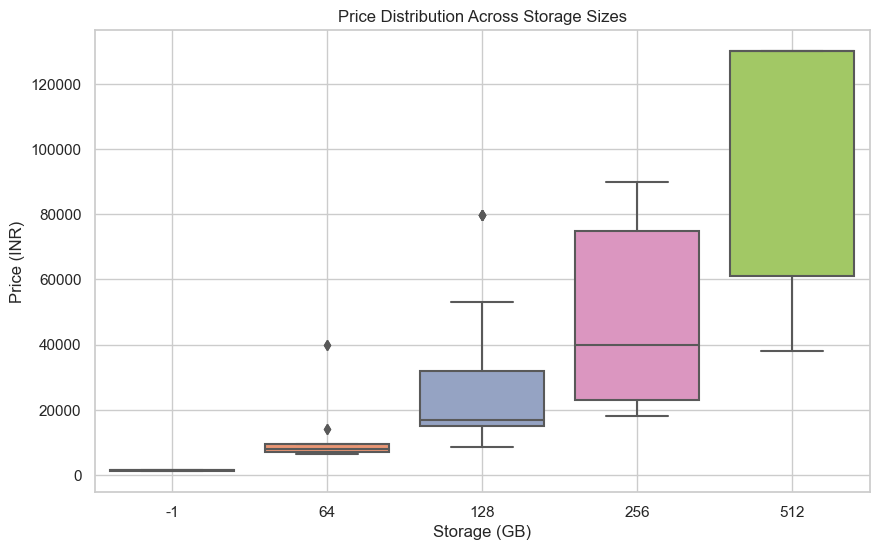

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Storage_GB', y='Price', palette="Set2")
plt.title("Price Distribution Across Storage Sizes")
plt.xlabel("Storage (GB)")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

### Price vs. No_of_Reviews

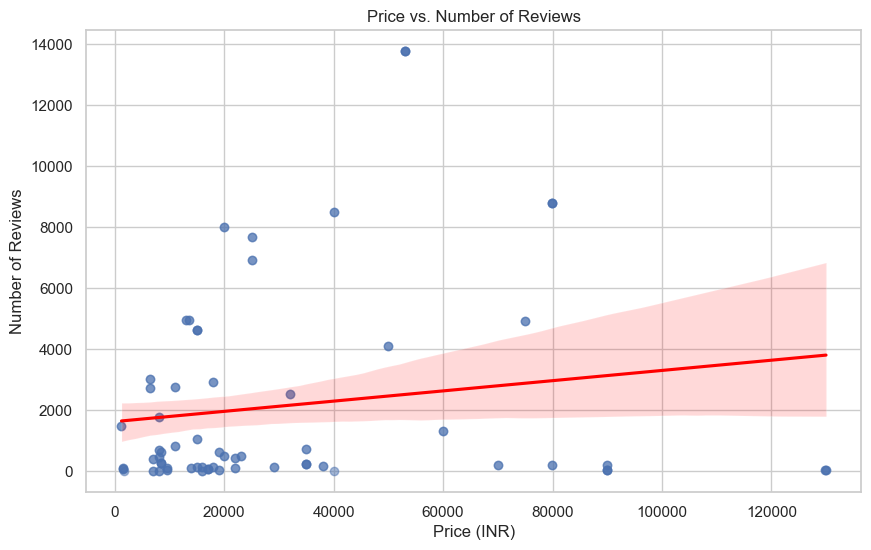

In [87]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Price', y='No_of_Reviews', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Price vs. Number of Reviews")
plt.xlabel("Price (INR)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

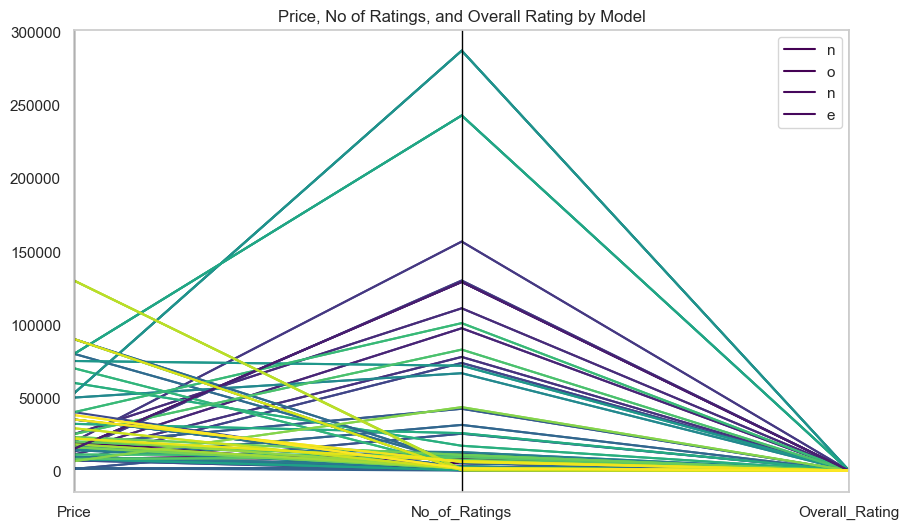

In [88]:
from pandas.plotting import parallel_coordinates

df['Model'] = df['Model'].astype('category')

plt.figure(figsize=(10, 6))
parallel_coordinates(df[['Price', 'No_of_Ratings', 'Overall_Rating', 'Model']], 'Model', colormap='viridis')
plt.title('Price, No of Ratings, and Overall Rating by Model')
plt.legend('none')
plt.show()

### Distribution of reviews for different price ranges

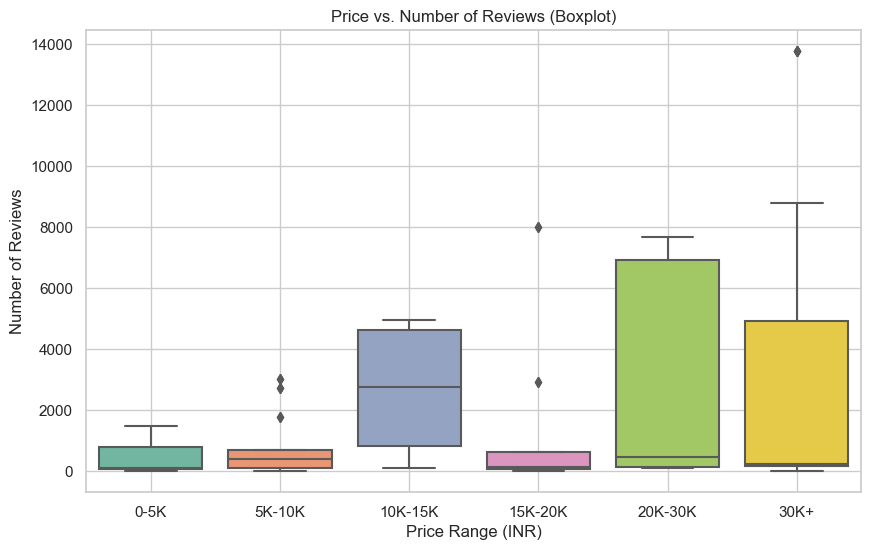

In [90]:
price_bins = [0, 5000, 10000, 15000, 20000, 30000, float('inf')]
price_labels = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-30K', '30K+']
df['Price_Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price_Category', y='No_of_Reviews', palette="Set2")
plt.title("Price vs. Number of Reviews (Boxplot)")
plt.xlabel("Price Range (INR)")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

### Bubble plot with size based on Overall_Rating

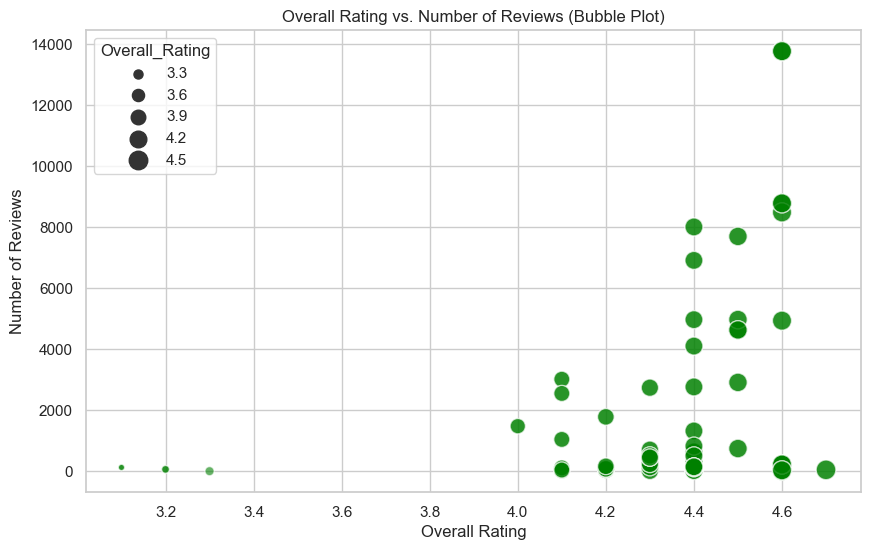

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Overall_Rating', y='No_of_Reviews', size='Overall_Rating', sizes=(20, 200), alpha=0.6, color='green')
plt.title("Overall Rating vs. Number of Reviews (Bubble Plot)")
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

### Colour vs. Price

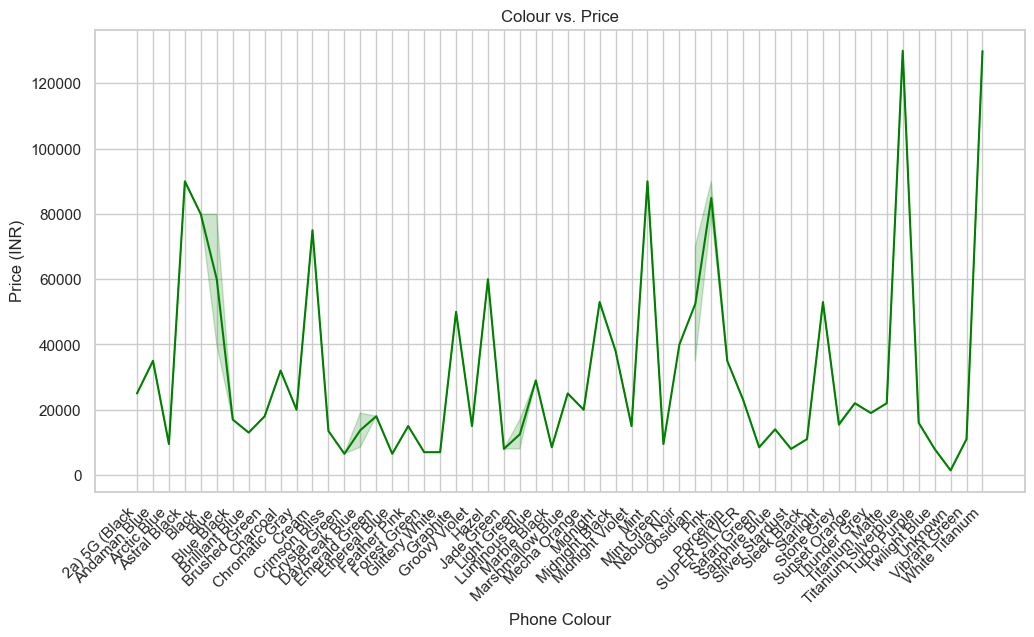

In [162]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Colour', y='Price', color="green")
plt.title("Colour vs. Price")
plt.xlabel("Phone Colour")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Storage vs. No_of_Ratings

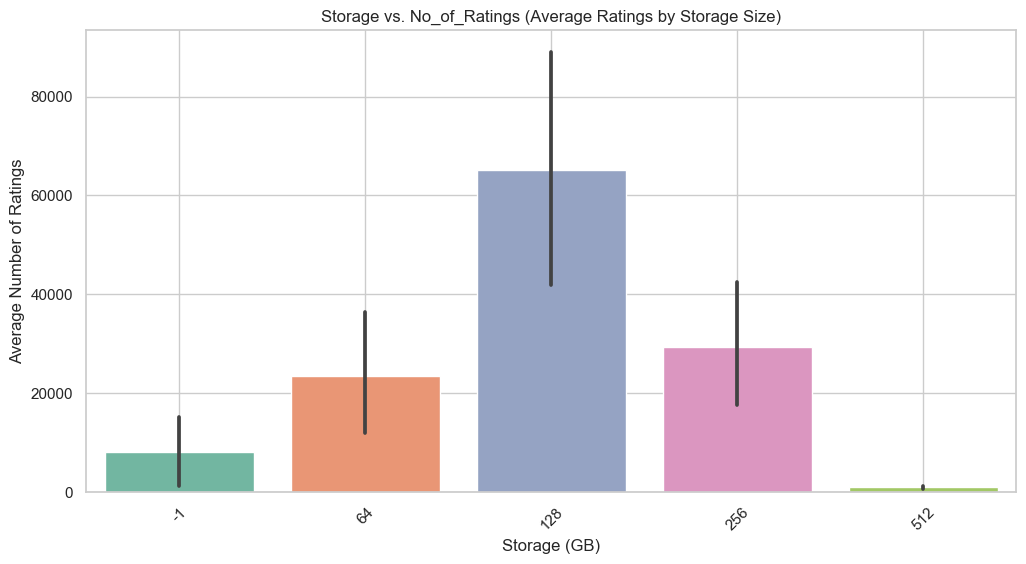

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Storage_GB', y='No_of_Ratings', estimator='mean', palette="Set2")
plt.title("Storage vs. No_of_Ratings (Average Ratings by Storage Size)")
plt.xlabel("Storage (GB)")
plt.ylabel("Average Number of Ratings")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Price vs. Ratings (Grouped Price Ranges)

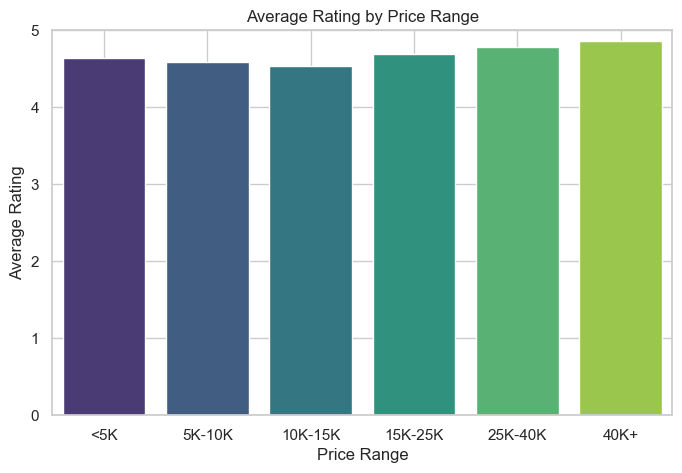

In [98]:
# Price range setting
bins = [0, 5000, 10000, 15000, 25000, 40000, float('inf')]
labels = ['<5K', '5K-10K', '10K-15K', '15K-25K', '25K-40K', '40K+']
df['Price_Range'] = pd.cut(df['Price'], bins=bins, labels=labels)

price_rating = df.groupby('Price_Range')['Average_Rating'].mean().reset_index()

# Plotting the barplot 
plt.figure(figsize=(8, 5))
sns.barplot(data=price_rating, x='Price_Range', y='Average_Rating', palette='viridis')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(True)
plt.show()

### Review Length vs. Overall Rating

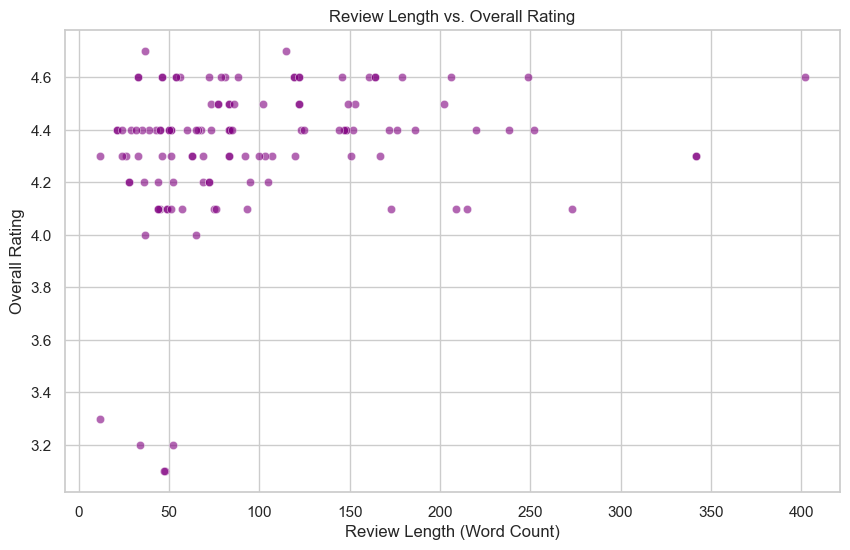

In [100]:
df['Review_Length'] = df['Review_Texts'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Review_Length', y='Overall_Rating', color='purple', alpha=0.6)
plt.title("Review Length vs. Overall Rating")
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Overall Rating")
plt.grid(True)
plt.show()

### Frequency of Sentiment Words in Reviews

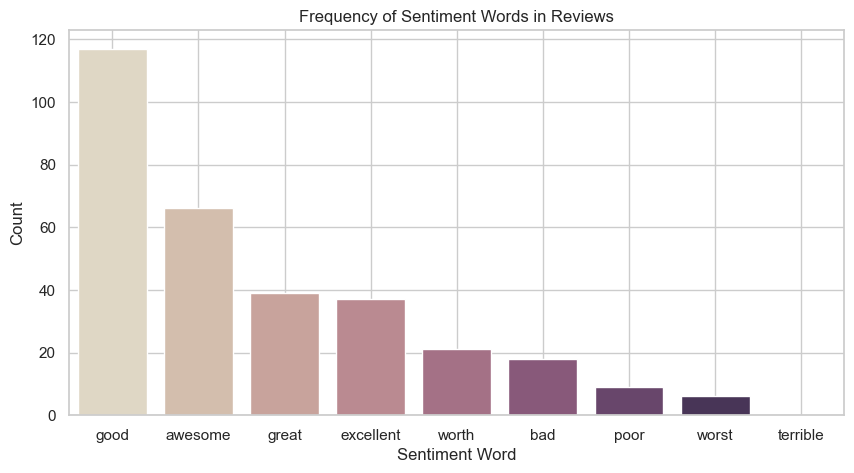

In [102]:
sentiment_keywords = ['awesome', 'great', 'excellent', 'good', 'bad', 'poor', 'terrible', 'worth', 'worst']

# Couting how many reviews contain each sentiment word
sentiment_counts = {word: df['Review_Texts'].str.contains(fr'\b{word}\b').sum() for word in sentiment_keywords}
sentiment_df = pd.DataFrame.from_dict(sentiment_counts, orient='index', columns=['Count']).sort_values('Count', ascending=False)

# Plotting the barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_df.index, y=sentiment_df['Count'], palette='ch:s=-.2,r=.6')
plt.title("Frequency of Sentiment Words in Reviews")
plt.xlabel("Sentiment Word")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Distribution of High Ratings (≥ 4.0)

In [104]:
# Overall rating
high_rating_count = (df['Overall_Rating'] >= 4).sum()
total_products = df['Overall_Rating'].notna().sum()

# Calculating the percentage
percentage_high_rated = (high_rating_count / total_products) * 100
print(f"{percentage_high_rated:.2f}% of products have an overall rating of 4.0 or above.")

# Average rating 
high_rating_count1 = (df['Average_Rating'] >= 4).sum()
total_products1 = df['Average_Rating'].notna().sum()

# Calculating the percentage
percentage_high_rated1 = (high_rating_count1 / total_products1) * 100
print(f"{percentage_high_rated1:.2f}% of products have an average rating of 4.0 or above.")

95.97% of products have an overall rating of 4.0 or above.
99.19% of products have an average rating of 4.0 or above.


In [105]:
# Giving sentiment according to the words in the review title 

from sklearn.preprocessing import LabelEncoder

positive_words = ["great", "excellent", "awesome", "good", "fantastic", "love", "best", "amazing", "perfect"]
negative_words = ["poor", "bad", "awful", "terrible", "disappointing", "worst", "horrible", "unacceptable"]

# Function to check for sentiment-heavy words in Review Titles
def get_sentiment(title):
    title = str(title).lower()
    positive_count = sum(word in title for word in positive_words)
    negative_count = sum(word in title for word in negative_words)
    
    # Assign sentiment: Positive, Negative, or Neutral (based on count of words)
    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'

df['Review_Title_Sentiment'] = df['Review_Titles'].apply(get_sentiment)
label_encoder = LabelEncoder()
df['Sentiment_Label'] = label_encoder.fit_transform(df['Review_Title_Sentiment'])

# Alternatively, use a heatmap to visualize the correlation of sentiments with ratings
sentiment_rating_pivot = pd.pivot_table(df, values='Overall_Rating', index='Review_Title_Sentiment', aggfunc='mean')


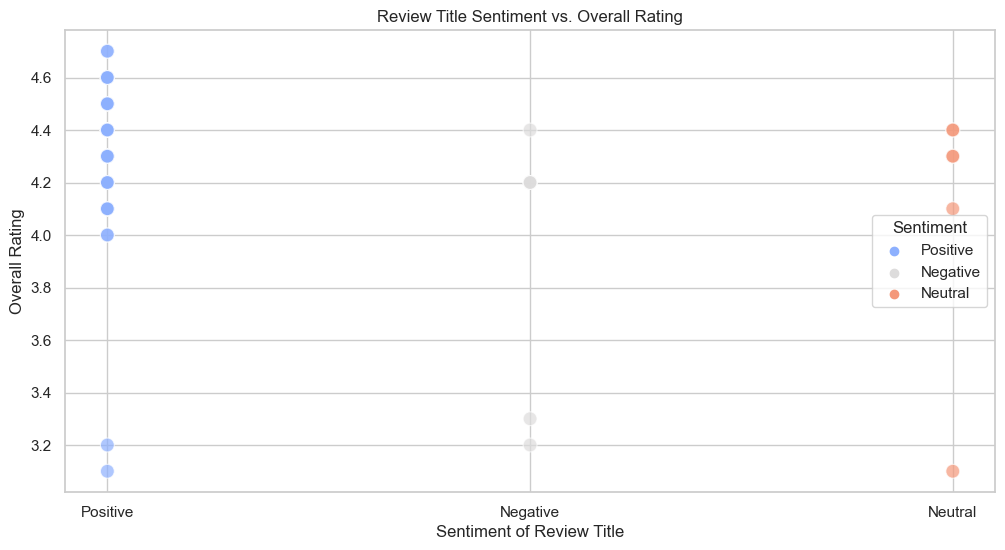

In [166]:
# Scatter plot of Sentiment vs. Overall Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Review_Title_Sentiment', y='Overall_Rating', hue='Review_Title_Sentiment', palette='coolwarm', s=100, alpha=0.7)
plt.title("Review Title Sentiment vs. Overall Rating")
plt.xlabel("Sentiment of Review Title")
plt.ylabel("Overall Rating")
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

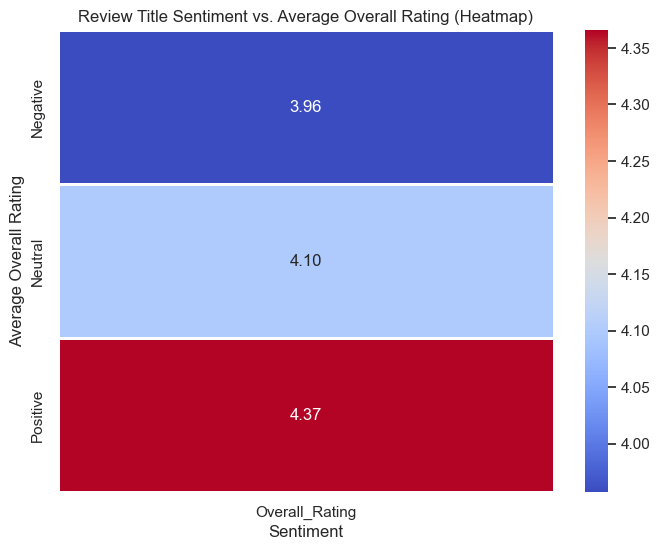

In [107]:
# Heatmap of sentiment vs. average overall rating
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_rating_pivot, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title("Review Title Sentiment vs. Average Overall Rating (Heatmap)")
plt.xlabel("Sentiment")
plt.ylabel("Average Overall Rating")
plt.show()

In [108]:
df.head()

,Unique_ID,Product_URL,Product_Title,Model,Colour,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Price,Storage_GB,Review_Titles,Review_Texts,Price_Category,Review_Word_Count,Price_Range,Review_Length,Review_Title_Sentiment,Sentiment_Label
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,5105.0,413.0,4.3,4.4,6999.0,64,great product terrific terrific purchase just ...,sound good good work motorola worth money good...,5K-10K,107,5K-10K,107,Positive,2
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,5105.0,413.0,4.3,4.7,6999.0,64,fair worth every penny terrific best in the ma...,overall phone good but specifications like bat...,5K-10K,51,5K-10K,51,Positive,2
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,8384.0,635.0,4.4,4.8,18999.0,128,awesome mindblowing purchase perfect product h...,the camera quality awesome display also awesom...,15K-20K,148,15K-25K,148,Positive,2
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,8384.0,635.0,4.4,5.0,18999.0,128,awesome just wow best in the market best in th...,everything perfect segment camera also very go...,15K-20K,45,15K-25K,45,Positive,2
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews",realme C61,Safari Green,9263.0,283.0,4.4,4.4,8499.0,128,simply awesome mindblowing purchase just wow d...,good look very nice product goodthank flipkart...,5K-10K,83,5K-10K,83,Positive,2


In [109]:
df.loc[df['Review_Title_Sentiment'] == 'Positive'].shape

(111, 19)

In [110]:
df.shape

(124, 19)

### Multivariate Analysis

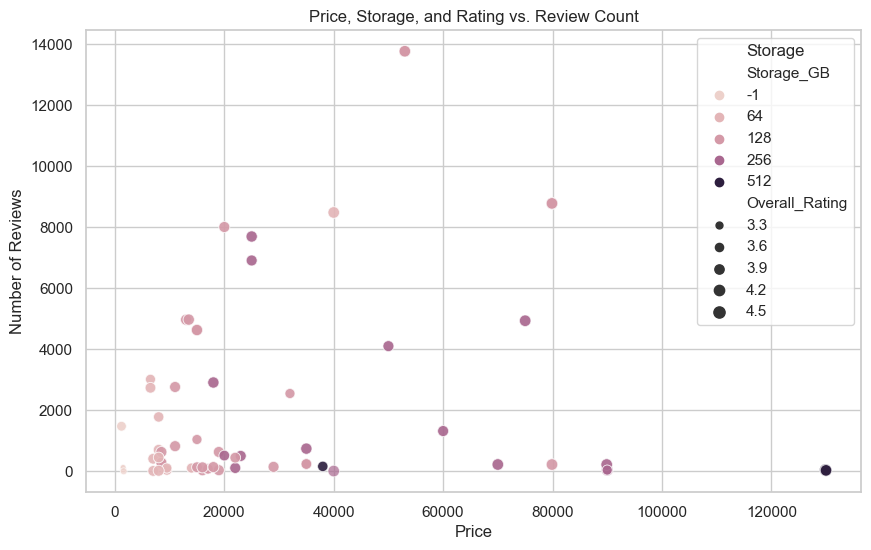

In [113]:
# How do these together affect Review Count?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='No_of_Reviews', hue='Storage_GB', size='Overall_Rating', data=df, alpha=0.7)
plt.title("Price, Storage, and Rating vs. Review Count")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.legend(title='Storage', loc='upper right')
plt.show()

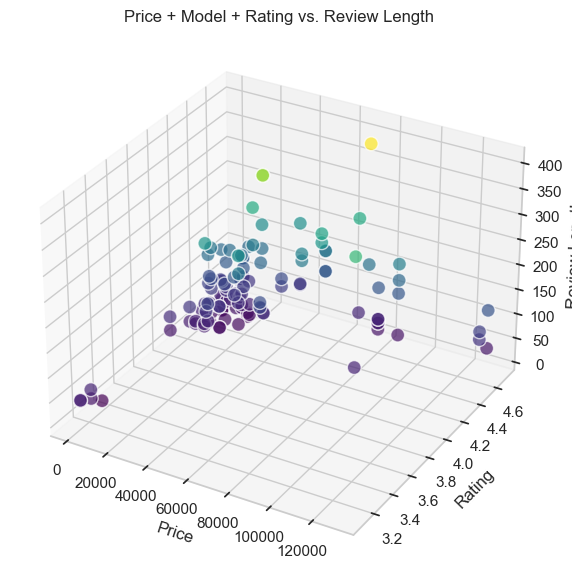

In [114]:
# 3d-scatter plot for price, model, Overall_Rating vs Review Length 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Price'], df['Overall_Rating'], df['Review_Length'], c=df['Review_Length'], cmap='viridis', s=100, edgecolors='w', alpha=0.7)
ax.set_xlabel('Price')
ax.set_ylabel('Rating')
ax.set_zlabel('Review Length')
ax.set_title('Price + Model + Rating vs. Review Length')
plt.show()

### Sentiment Analysis

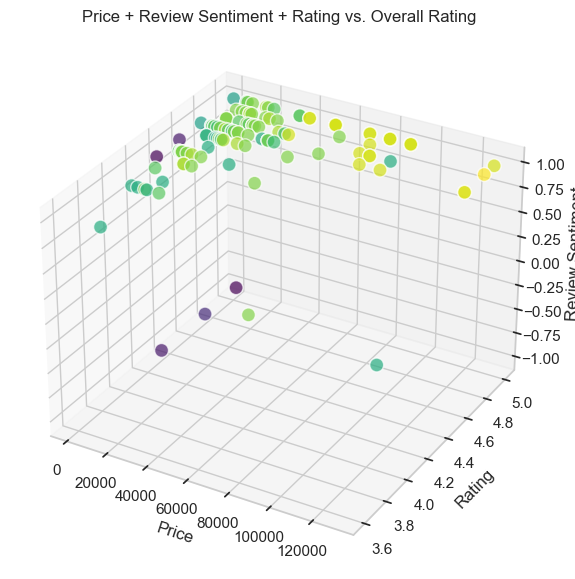

In [115]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Sentiment Analysis: VADER
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Review_Sentiment'] = df['Review_Texts'].apply(get_sentiment)

sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment_Num'] = df['Review_Sentiment'].map(sentiment_map)

# Creating a 3D scatter plot for Price + Rating + Sentiment vs Overall Rating
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Price, Rating, Sentiment, Overall Rating as color
ax.scatter(df['Price'], df['Average_Rating'], df['Sentiment_Num'], c=df['Overall_Rating'], cmap='viridis', s=100, edgecolors='w', alpha=0.7)
ax.set_xlabel('Price')
ax.set_ylabel('Rating')
ax.set_zlabel('Review Sentiment')
ax.set_title('Price + Review Sentiment + Rating vs. Overall Rating')
plt.show()

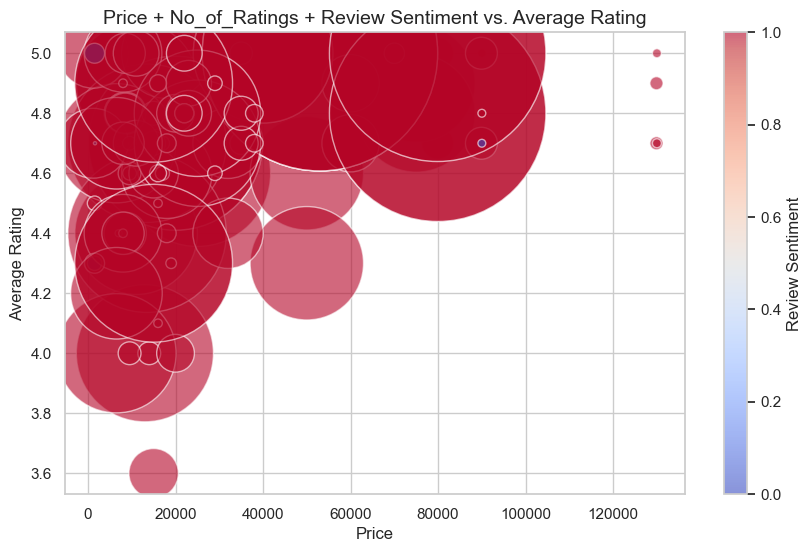

In [116]:
# Sentiment Encoding 

sentiment_encoder = LabelEncoder()
df['Sentiment_Code'] = sentiment_encoder.fit_transform(df['Review_Sentiment'])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Price'], df['Average_Rating'], 
                      s=df['No_of_Ratings'] / 10,  # Size of bubble based on No_of_Ratings
                      c=df['Sentiment_Code'], cmap='coolwarm', alpha=0.6, edgecolors='w', linewidth=1)

plt.colorbar(scatter, label='Review Sentiment')
plt.title('Price + No_of_Ratings + Review Sentiment vs. Average Rating', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True)
plt.show()

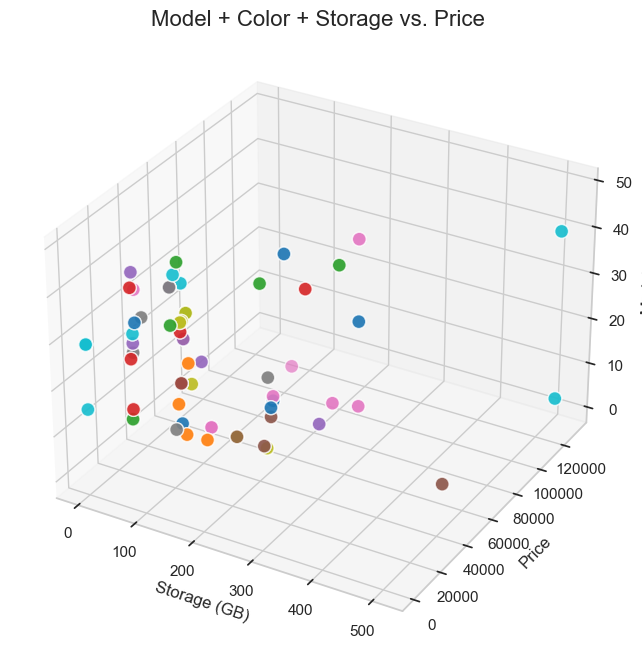

In [117]:
# Mode encoding and color encoding

model_encoder = LabelEncoder()
color_encoder = LabelEncoder()
df['Model_Code'] = model_encoder.fit_transform(df['Model'])
df['Color_Code'] = color_encoder.fit_transform(df['Colour'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Storage_GB'], df['Price'], df['Model_Code'], 
           c=df['Color_Code'], cmap='tab10', s=100, alpha=0.7, edgecolors='w')

ax.set_xlabel('Storage (GB)')
ax.set_ylabel('Price')
ax.set_zlabel('Model')
ax.set_title('Model + Color + Storage vs. Price', fontsize=16)
plt.show()

In [118]:
df.head()

,Unique_ID,Product_URL,Product_Title,Model,Colour,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Price,...,Review_Word_Count,Price_Range,Review_Length,Review_Title_Sentiment,Sentiment_Label,Review_Sentiment,Sentiment_Num,Sentiment_Code,Model_Code,Color_Code
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,5105.0,413.0,4.3,4.4,6999.0,...,107,5K-10K,107,Positive,2,Positive,1,1,16,18
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,5105.0,413.0,4.3,4.7,6999.0,...,51,5K-10K,51,Positive,2,Positive,1,1,16,18
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,8384.0,635.0,4.4,4.8,18999.0,...,148,15K-25K,148,Positive,2,Positive,1,1,36,14
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,8384.0,635.0,4.4,5.0,18999.0,...,45,15K-25K,45,Positive,2,Positive,1,1,36,14
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews",realme C61,Safari Green,9263.0,283.0,4.4,4.4,8499.0,...,83,5K-10K,83,Positive,2,Positive,1,1,44,39


In [119]:
df.columns

Index(['Unique_ID', 'Product_URL', 'Product_Title', 'Model', 'Colour',
       'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average_Rating',
       'Price', 'Storage_GB', 'Review_Titles', 'Review_Texts',
       'Price_Category', 'Review_Word_Count', 'Price_Range', 'Review_Length',
       'Review_Title_Sentiment', 'Sentiment_Label', 'Review_Sentiment',
       'Sentiment_Num', 'Sentiment_Code', 'Model_Code', 'Color_Code'],
      dtype='object')

Review_Sentiment
Positive    119
Negative      5
Name: count, dtype: int64


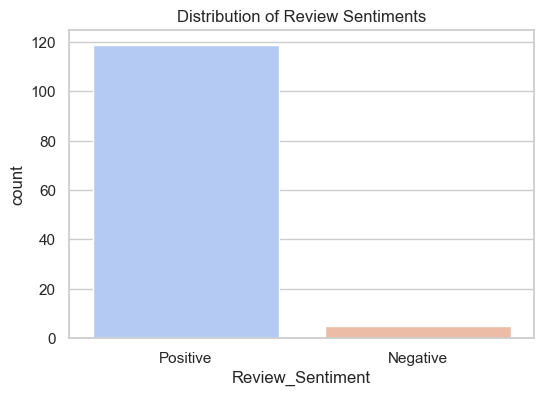

In [120]:
# Distribution of review sentiment
print(df['Review_Sentiment'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Review_Sentiment', palette='coolwarm')
plt.title('Distribution of Review Sentiments')
plt.show()

### Keyword Extraction

In [122]:
# Extracting keywords to know the sentiment more clearly

from collections import Counter

def get_keywords(texts, top_n=20):
    words = []
    for text in texts:
        tokens = text.lower().split()
        filtered = [word for word in tokens if word.isalpha() and word not in stop_words]
        words.extend(filtered)
    return Counter(words).most_common(top_n)

positive_reviews = df[df['Review_Sentiment'] == 'Positive']['Review_Texts']
positive_keywords = get_keywords(positive_reviews)

negative_reviews = df[df['Review_Sentiment'] == 'Negative']['Review_Texts']
negative_keywords = get_keywords(negative_reviews)


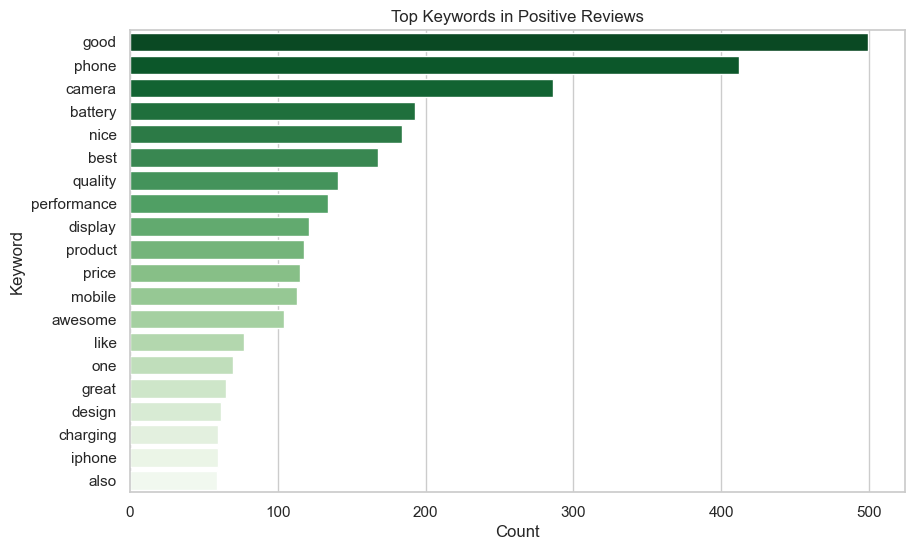

In [123]:
# Visualising positive keywords

pos_words, pos_counts = zip(*positive_keywords)
plt.figure(figsize=(10,6))
sns.barplot(x=list(pos_counts), y=list(pos_words), palette='Greens_r')
plt.title('Top Keywords in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

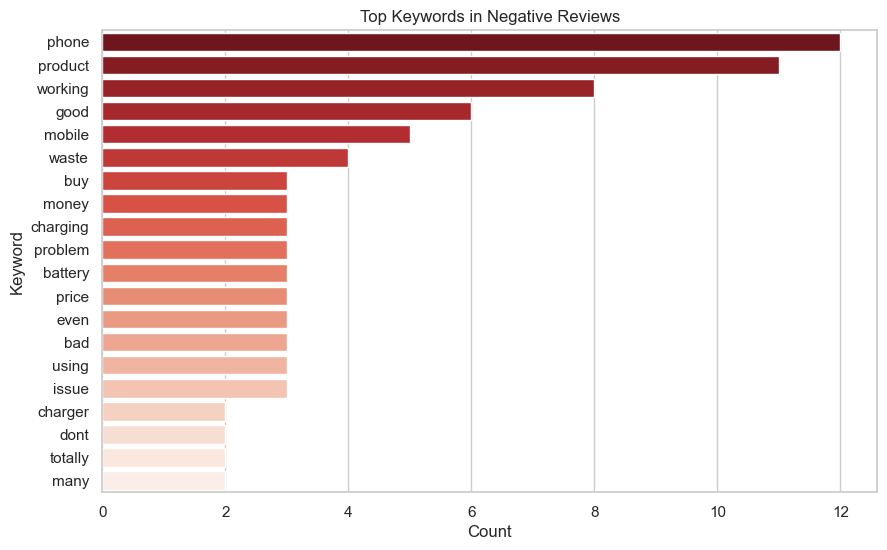

In [124]:
# Visualising negative keywords

neg_words, neg_counts = zip(*negative_keywords)
plt.figure(figsize=(10,6))
sns.barplot(x=list(neg_counts), y=list(neg_words), palette='Reds_r')
plt.title('Top Keywords in Negative Reviews')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

### N-grams

In [126]:
from nltk.util import ngrams

# Frequent Bigrams / Trigrams
def get_ngrams(texts, n=2, top_n=20):
    ngram_counter = Counter()
    for text in texts:
        tokens = [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
        ngrams_list = list(ngrams(tokens, n))
        ngram_counter.update(ngrams_list)
    return ngram_counter.most_common(top_n)


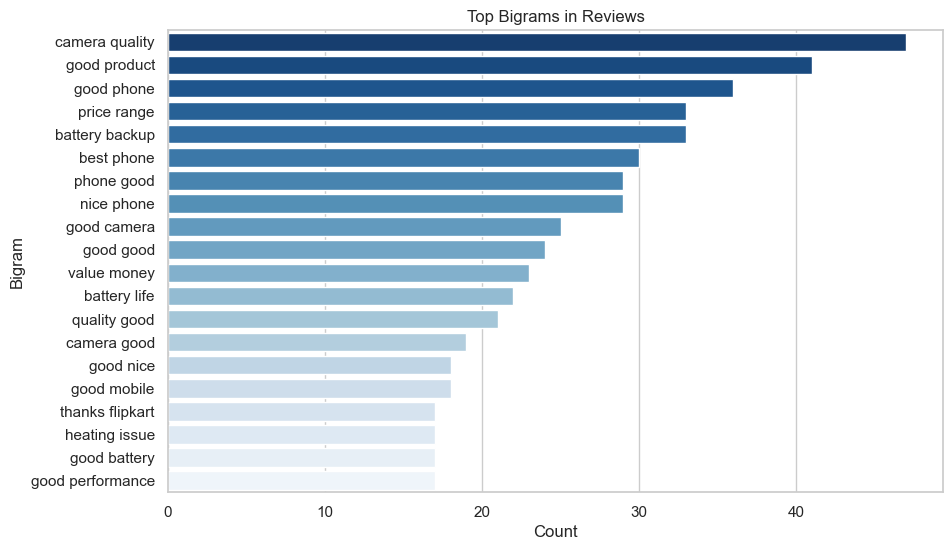

In [127]:
# Bigrams
bigrams = get_ngrams(df['Review_Texts'], n=2)
bi_words = [' '.join(bi) for bi, count in bigrams]
bi_counts = [count for bi, count in bigrams]

plt.figure(figsize=(10,6))
sns.barplot(x=bi_counts, y=bi_words, palette='Blues_r')
plt.title('Top Bigrams in Reviews')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

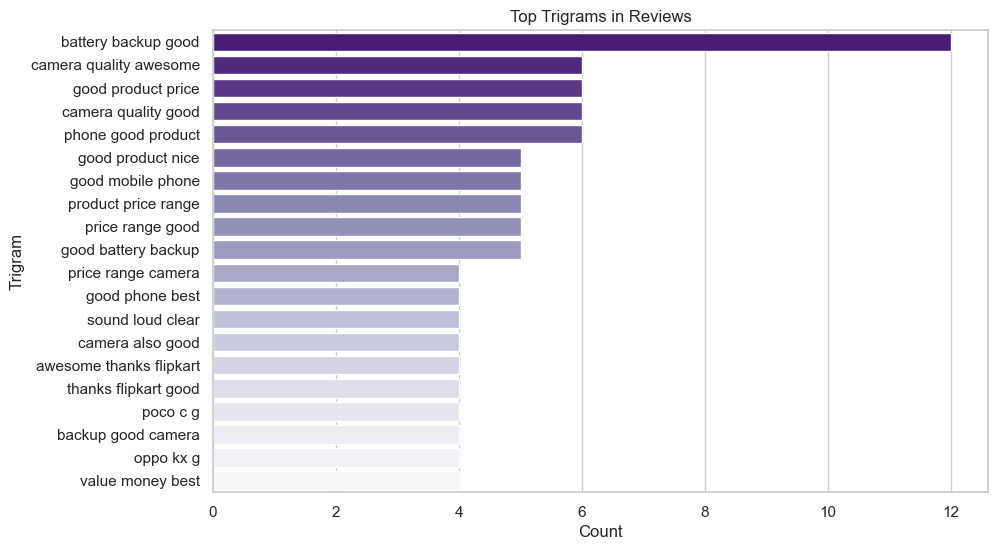

In [128]:
# Trigrams
trigrams = get_ngrams(df['Review_Texts'], n=3)
tri_words = [' '.join(tri) for tri, count in trigrams]
tri_counts = [count for tri, count in trigrams]

plt.figure(figsize=(10,6))
sns.barplot(x=tri_counts, y=tri_words, palette='Purples_r')
plt.title('Top Trigrams in Reviews')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

### Topic Clustering (LDA - Latent Dirichlet Allocation)

A probabilistic topic modeling technique used to discover hidden thematic structures within a collection of documents

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['Review_Texts'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # you can adjust n_components
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [171]:
# Displaying t Topics
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    print([words[i] for i in topic.argsort()[-10:]])
    print("\n")

Topic 1:
['device', 'awesome', 'design', 'extraordinary', 'ios', 'good', 'pink', 'best', 'phone', 'camera']


Topic 2:
['mobile', 'performance', 'quality', 'product', 'best', 'battery', 'nice', 'camera', 'phone', 'good']


Topic 3:
['iphone', 'performance', 'battery', 'great', 'display', 'awesome', 'best', 'camera', 'good', 'phone']


Topic 4:
['oppo', 'performance', 'mobile', 'samsung', 'battery', 'display', 'quality', 'good', 'camera', 'phone']


Topic 5:
['got', 'smooth', 'camera', 'look', 'awesome', 'display', 'flipkart', 'quality', 'best', 'phone']




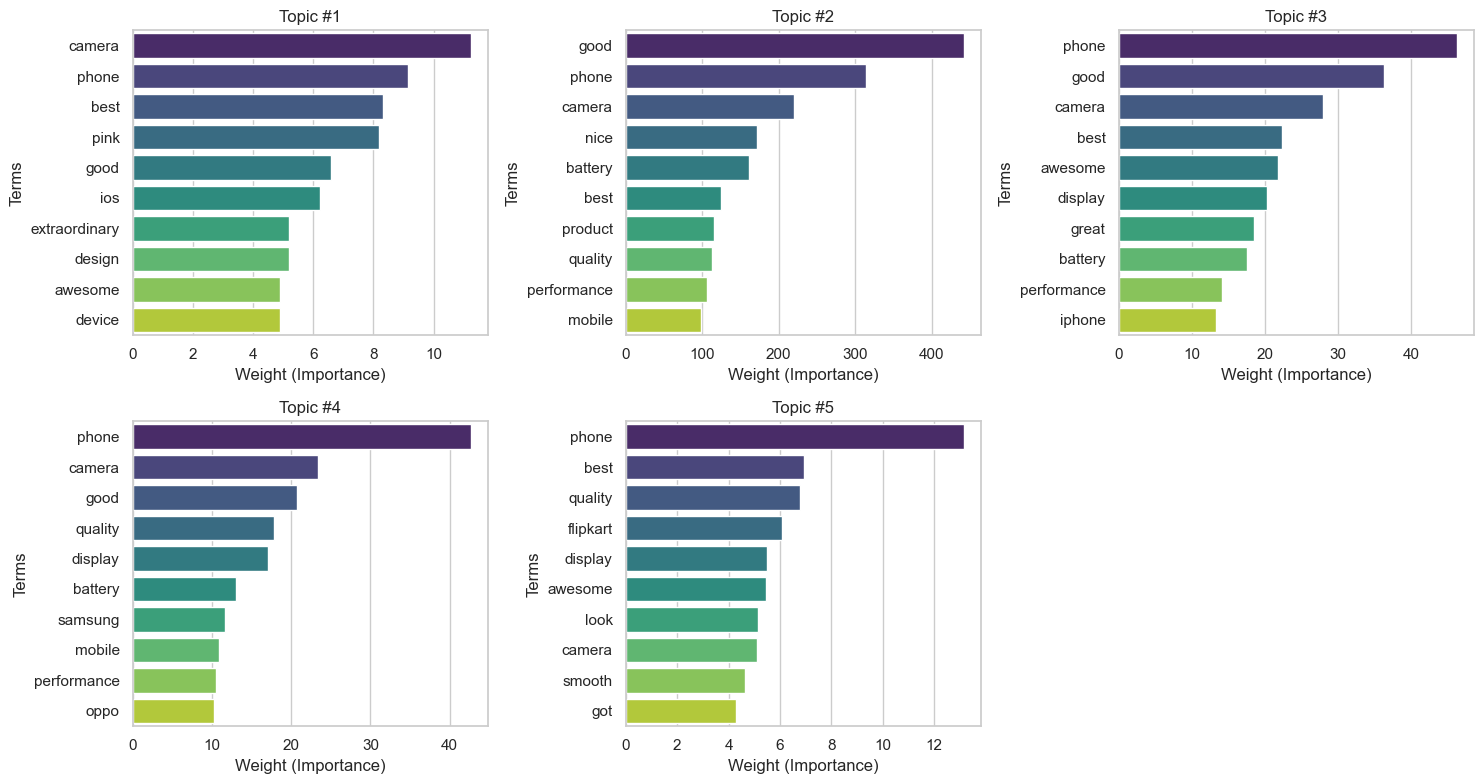

In [173]:
# Top terms per topic as bar plots

n_top_words = 10 
plt.figure(figsize=(15, 8))

for idx, topic in enumerate(lda.components_):
    plt.subplot(2, 3, idx+1) 
    top_words_idx = topic.argsort()[-n_top_words:][::-1]
    top_words = [words[i] for i in top_words_idx] 
    top_weights = topic[top_words_idx] 
    
    sns.barplot(x=top_weights, y=top_words, palette='viridis')
    plt.title(f"Topic #{idx + 1}")
    plt.xlabel('Weight (Importance)')
    plt.ylabel('Terms')

plt.tight_layout()
plt.show()


In [133]:
df.columns

Index(['Unique_ID', 'Product_URL', 'Product_Title', 'Model', 'Colour',
       'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average_Rating',
       'Price', 'Storage_GB', 'Review_Titles', 'Review_Texts',
       'Price_Category', 'Review_Word_Count', 'Price_Range', 'Review_Length',
       'Review_Title_Sentiment', 'Sentiment_Label', 'Review_Sentiment',
       'Sentiment_Num', 'Sentiment_Code', 'Model_Code', 'Color_Code'],
      dtype='object')

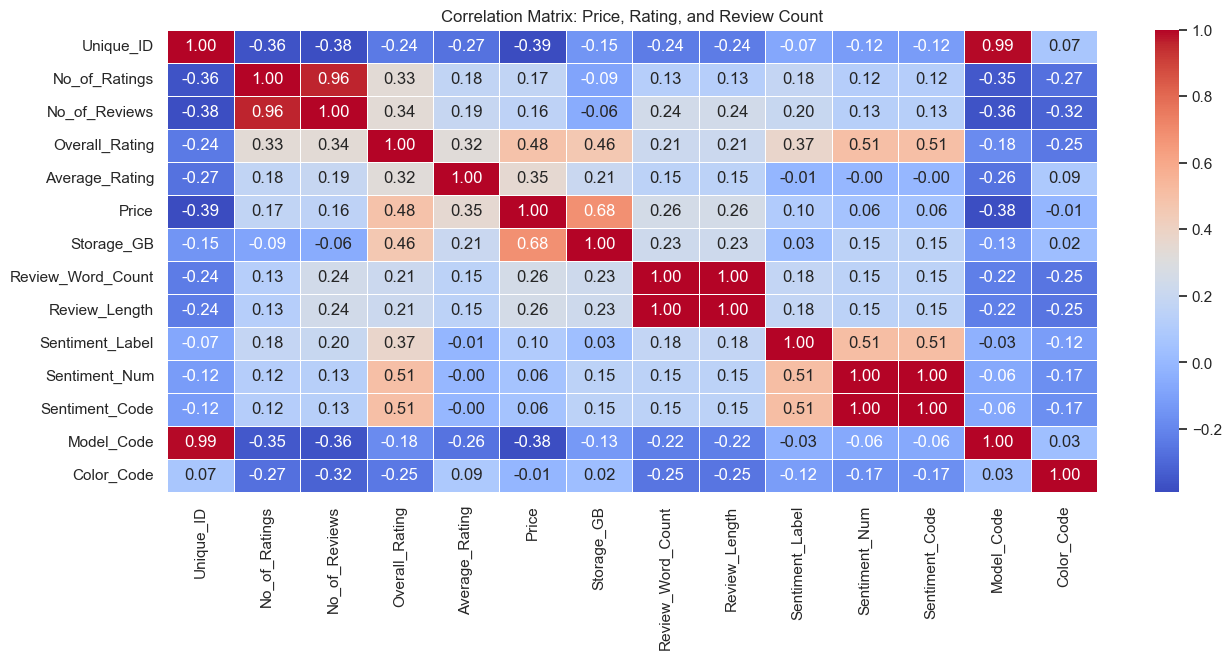

In [149]:
# Correlation Matrix to know the realtion between columns 

correlation_matrix = df[['Unique_ID',
       'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average_Rating',
       'Price', 'Storage_GB',
       'Review_Word_Count', 'Review_Length',
        'Sentiment_Label',
       'Sentiment_Num', 'Sentiment_Code', 'Model_Code', 'Color_Code']].corr()

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix: Price, Rating, and Review Count')
plt.show()

In [151]:
df.head()

,Unique_ID,Product_URL,Product_Title,Model,Colour,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Price,...,Review_Word_Count,Price_Range,Review_Length,Review_Title_Sentiment,Sentiment_Label,Review_Sentiment,Sentiment_Num,Sentiment_Code,Model_Code,Color_Code
0,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,5105.0,413.0,4.3,4.4,6999.0,...,107,5K-10K,107,Positive,2,Positive,1,1,16,18
1,21,https://www.flipkart.com/motorola-g05-forest-g...,"MOTOROLA g05 (Forest Green, 64 GB) Reviews",MOTOROLA g05,Forest Green,5105.0,413.0,4.3,4.7,6999.0,...,51,5K-10K,51,Positive,2,Positive,1,1,16,18
2,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,8384.0,635.0,4.4,4.8,18999.0,...,148,15K-25K,148,Positive,2,Positive,1,1,36,14
3,44,https://www.flipkart.com/samsung-galaxy-m35-5g...,"SAMSUNG Galaxy M35 5G (DayBreak Blue, 128 GB) ...",SAMSUNG Galaxy M35 5G,DayBreak Blue,8384.0,635.0,4.4,5.0,18999.0,...,45,15K-25K,45,Positive,2,Positive,1,1,36,14
4,56,https://www.flipkart.com/realme-c61-safari-gre...,"realme C61 (Safari Green, 128 GB) Reviews",realme C61,Safari Green,9263.0,283.0,4.4,4.4,8499.0,...,83,5K-10K,83,Positive,2,Positive,1,1,44,39


In [ ]:
# df.to_csv("Mobiles.csv", index = False)